<center><h1>Last_First_HW4</h1></center>
<br>
<br>

Name: Raj Vijay Maharajwala
<br>
Github Username: RajMaharajwala
<br>
USC ID: 4863-3649-66

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
# !pip install bootstrapped

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import cufflinks as cf
import statsmodels.formula.api as smf
import statsmodels.api as sm
from glob import glob
import  re
import bootstrapped.bootstrap as bs
import scipy.stats as stats
import bootstrapped.stats_functions as bs_stats
import warnings
import random
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from math import floor
from scipy import stats
import sys

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Get the AReM Data Set

In [3]:
# All files and directories ending with .csv:
gl = glob("../data/AReM/*/*.csv")
gln = [x.replace('../data/AReM\\','') for x in gl]
print(len(gln))
print(gln)

88
['bending1\\dataset1.csv', 'bending1\\dataset2.csv', 'bending1\\dataset3.csv', 'bending1\\dataset4.csv', 'bending1\\dataset5.csv', 'bending1\\dataset6.csv', 'bending1\\dataset7.csv', 'bending2\\dataset1.csv', 'bending2\\dataset2.csv', 'bending2\\dataset3.csv', 'bending2\\dataset4.csv', 'bending2\\dataset5.csv', 'bending2\\dataset6.csv', 'cycling\\dataset1.csv', 'cycling\\dataset10.csv', 'cycling\\dataset11.csv', 'cycling\\dataset12.csv', 'cycling\\dataset13.csv', 'cycling\\dataset14.csv', 'cycling\\dataset15.csv', 'cycling\\dataset2.csv', 'cycling\\dataset3.csv', 'cycling\\dataset4.csv', 'cycling\\dataset5.csv', 'cycling\\dataset6.csv', 'cycling\\dataset7.csv', 'cycling\\dataset8.csv', 'cycling\\dataset9.csv', 'lying\\dataset1.csv', 'lying\\dataset10.csv', 'lying\\dataset11.csv', 'lying\\dataset12.csv', 'lying\\dataset13.csv', 'lying\\dataset14.csv', 'lying\\dataset15.csv', 'lying\\dataset2.csv', 'lying\\dataset3.csv', 'lying\\dataset4.csv', 'lying\\dataset5.csv', 'lying\\dataset6.c

### (b) Splitting Data

In [4]:
# Training data
# for training bending 1 data
file_bend1 = ['dataset3.csv','dataset4.csv','dataset5.csv','dataset6.csv','dataset7.csv']
bend1_list = []
for f1 in file_bend1: 
    dfbend1_i = pd.read_csv('../data/AReM/bending1/' + f1, skiprows=4)
    dfbend1_i = dfbend1_i.rename(columns={'# Columns: time':'time'})
    bend1_list.append(dfbend1_i)
    
bend1_train = pd.concat(bend1_list, ignore_index = True)

# for training bending 2 data
file_bend2 = ['dataset3.csv','dataset4.csv','dataset4.csv','dataset5.csv','dataset6.csv']
bend2_list = []
for f2 in file_bend2: 
    dfbend2_i = pd.read_csv('../data/AReM/bending2/' + f2, skiprows=4)
    dfbend2_i = dfbend2_i.rename(columns={'# Columns: time':'time'})
    bend2_list.append(dfbend2_i)
    
bend2_train = pd.concat(bend2_list, ignore_index = True)

# for training cycling data
regex = re.compile("\d+")
gl = glob("../data/AReM/cycling/*.csv")
file_cycling = [x.replace('../data/AReM/cycling\\','') for x in gl]
file_cycling.sort(key=lambda x: int(regex.search(x).group())) # for sorting based on number in file dataset10.csv, etc
#print(file_cycling,"\n")
#print(file_cycling[3:])
cycling_list = []
for f in file_cycling[3:]: 
    dfcycling_i = pd.read_csv('../data/AReM/cycling/' + f, skiprows=4)
    dfcycling_i = dfcycling_i.rename(columns={'# Columns: time':'time'})
    cycling_list.append(dfcycling_i)
    #print("Added",f)
    
cycling_train = pd.concat(cycling_list, ignore_index = True)

# for training lying data
regex = re.compile("\d+")
gl = glob("../data/AReM/lying/*.csv")
file_lying = [x.replace('../data/AReM/lying\\','') for x in gl]
file_lying.sort(key=lambda x: int(regex.search(x).group())) # for sorting based on number in file dataset10.csv, etc
#print(file_lying,"\n")
#print(file_lying[3:])
lying_list = []
for f in file_lying[3:]: 
    dflying_i = pd.read_csv('../data/AReM/lying/' + f, skiprows=4)
    dflying_i = dflying_i.rename(columns={'# Columns: time':'time'})
    lying_list.append(dflying_i)
    #print("Added",f)
    
lying_train = pd.concat(lying_list, ignore_index = True)

# for training sitting data
regex = re.compile("\d+")
gl = glob("../data/AReM/sitting/*.csv")
file_sitting = [x.replace('../data/AReM/sitting\\','') for x in gl]
file_sitting.sort(key=lambda x: int(regex.search(x).group())) # for sorting based on number in file dataset10.csv, etc
#print(file_sitting,"\n")
#print(file_sitting[3:])
sitting_list = []
for f in file_sitting[3:]: 
    dfsitting_i = pd.read_csv('../data/AReM/sitting/' + f, skiprows=4)
    dfsitting_i = dfsitting_i.rename(columns={'# Columns: time':'time'})
    sitting_list.append(dfsitting_i)
    #print("Added",f)
    
sitting_train = pd.concat(sitting_list, ignore_index = True)

# for training standing data
regex = re.compile("\d+")
gl = glob("../data/AReM/standing/*.csv")
file_standing = [x.replace('../data/AReM/standing\\','') for x in gl]
file_standing.sort(key=lambda x: int(regex.search(x).group())) # for sorting based on number in file dataset10.csv, etc
#print(file_standing,"\n")
#print(file_standing[3:])
standing_list = []
for f in file_standing[3:]: 
    dfstanding_i = pd.read_csv('../data/AReM/standing/' + f, skiprows=4)
    dfstanding_i = dfstanding_i.rename(columns={'# Columns: time':'time'})
    standing_list.append(dfstanding_i)
    #print("Added",f)
    
standing_train = pd.concat(standing_list, ignore_index = True)

# for training walking data
regex = re.compile("\d+")
gl = glob("../data/AReM/walking/*.csv")
file_walking = [x.replace('../data/AReM/walking\\','') for x in gl]
file_walking.sort(key=lambda x: int(regex.search(x).group())) # for sorting based on number in file dataset10.csv, etc
#print(file_walking,"\n")
#print(file_walking[3:])
walking_list = []
for f in file_walking[3:]: 
    dfwalking_i = pd.read_csv('../data/AReM/walking/' + f, skiprows=4)
    dfwalking_i = dfwalking_i.rename(columns={'# Columns: time':'time'})
    walking_list.append(dfwalking_i)
    #print("Added",f)
    
walking_train = pd.concat(walking_list, ignore_index = True)

# Testing Data
# for test bending 1 data
file_bend1 = ['dataset1.csv','dataset2.csv']
bend1_list = []
for f1 in file_bend1: 
    dfbend1_i = pd.read_csv('../data/AReM/bending1/' + f1, skiprows=4)
    dfbend1_i = dfbend1_i.rename(columns={'# Columns: time':'time'})
    bend1_list.append(dfbend1_i)
    
bend1_test = pd.concat(bend1_list, ignore_index = True)

# for test bending 2 data
file_bend2 = ['dataset1.csv','dataset2.csv']
bend2_list = []
for f2 in file_bend2: 
    dfbend2_i = pd.read_csv('../data/AReM/bending2/' + f2, skiprows=4)
    dfbend2_i = dfbend2_i.rename(columns={'# Columns: time':'time'})
    bend2_list.append(dfbend2_i)
    
bend2_test = pd.concat(bend2_list, ignore_index = True)

# for test cycling data
file_cycling = ['dataset1.csv','dataset2.csv','dataset3.csv']
cycling_list = []
for f in file_cycling: 
    dfcycling_i = pd.read_csv('../data/AReM/cycling/' + f, skiprows=4)
    dfcycling_i = dfcycling_i.rename(columns={'# Columns: time':'time'})
    cycling_list.append(dfcycling_i)
    #print("Added",f)
    
cycling_test = pd.concat(cycling_list, ignore_index = True)

# for test lying data
file_lying = ['dataset1.csv','dataset2.csv','dataset3.csv']
lying_list = []
for f in file_lying: 
    dflying_i = pd.read_csv('../data/AReM/lying/' + f, skiprows=4)
    dflying_i = dflying_i.rename(columns={'# Columns: time':'time'})
    lying_list.append(dflying_i)
    #print("Added",f)
    
lying_test = pd.concat(lying_list, ignore_index = True)

# for test sitting data
file_sitting = ['dataset1.csv','dataset2.csv','dataset3.csv']
sitting_list = []
for f in file_sitting: 
    dfsitting_i = pd.read_csv('../data/AReM/sitting/' + f, skiprows=4)
    dfsitting_i = dfsitting_i.rename(columns={'# Columns: time':'time'})
    sitting_list.append(dfsitting_i)
    #print("Added",f)
    
sitting_test = pd.concat(sitting_list, ignore_index = True)

# for test standing data
file_standing = ['dataset1.csv','dataset2.csv','dataset3.csv']
standing_list = []
for f in file_standing: 
    dfstanding_i = pd.read_csv('../data/AReM/standing/' + f, skiprows=4)
    dfstanding_i = dfstanding_i.rename(columns={'# Columns: time':'time'})
    standing_list.append(dfstanding_i)
    #print("Added",f)
    
standing_test = pd.concat(standing_list, ignore_index = True)

# for test walking data
file_walking = ['dataset1.csv','dataset2.csv','dataset3.csv']
walking_list = []
for f in file_walking: 
    dfwalking_i = pd.read_csv('../data/AReM/walking/' + f, skiprows=4)
    dfwalking_i = dfwalking_i.rename(columns={'# Columns: time':'time'})
    walking_list.append(dfwalking_i)
    #print("Added",f)
    
walking_test = pd.concat(walking_list, ignore_index = True)

bend1 = pd.concat([bend1_test, bend1_train], ignore_index= True)
bend2 = pd.concat([bend2_test, bend2_train], ignore_index= True)
cycling = pd.concat([cycling_test, cycling_train], ignore_index= True)
lying = pd.concat([lying_test, lying_train], ignore_index= True)
sitting = pd.concat([sitting_test, sitting_train], ignore_index= True)
standing = pd.concat([standing_test, standing_train], ignore_index= True)
walking = pd.concat([walking_test, walking_train], ignore_index= True)

Full_Training_data = pd.concat([bend1_train, bend2_train, cycling_train, lying_train, sitting_train, standing_train, walking_train], ignore_index = True)
Full_Testing_data = pd.concat([bend1_test, bend2_test, cycling_test, lying_test, sitting_test, standing_test, walking_test], ignore_index = True)
Full_data = pd.concat([bend1, bend2, cycling, lying, sitting, standing, walking], ignore_index = True)
Full_data.tail()

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
42714  118750      34.50       6.18       9.00       3.56      12.67   
42715  119000      25.75       6.02      13.75       2.05      16.00   
42716  119250      31.50       3.35      10.25       5.12      16.25   
42717  119500      33.75       2.77      14.00       3.24      13.75   
42718  119750      37.00       1.41      18.25       3.70      11.00   

       var_rss23  
42714       4.19  
42715       1.58  
42716       2.95  
42717       0.43  
42718       4.32

### (c) Feature Extraction

```
Some List of time-domain features that are usually used in time series classification are:

- Min 
- Max 
- Mean
- Median 
- Standard deviation 
- Variance
- first quartile
- third quartile
- Interquartile range
- Skewness
- Kurtosis
- Spectral Entropy
- Scaling properties
- Cross Correlation
```

In [5]:
def stats_df(List_path):
    DF_List = []
    for path in List_path:
        #print(path)
        df = pd.read_csv(path, skiprows=4) 
        df = df.rename(columns={'# Columns: time':'time'})
        new_clmn = ['min₁','max₁','mean₁','median₁','standard deviation₁','1st quart₁','3rd quart₁',
                    'min₂','max₂','mean₂','median₂','standard deviation₂','1st quart₂','3rd quart₂',
                    'min₃','max₃','mean₃','median₃','standard deviation₃','1st quart₃','3rd quart₃',
                    'min₄','max₄','mean₄','median₄','standard deviation₄','1st quart₄','3rd quart₄',
                    'min₅','max₅','mean₅','median₅','standard deviation₅','1st quart₅','3rd quart₅',
                    'min₆','max₆','mean₆','median₆','standard deviation₆','1st quart₆','3rd quart₆'
                   ]
        data = []
        for clmn in df.columns[1:]: #this loop is for appending stats of a column from a dataset
            min_x = df[clmn].min() 
            max_x = df[clmn].max()
            mean = round(df[clmn].mean(),2)
            median = round(df[clmn].median(),2)
            std = round(df[clmn].std(),3)
            first_q = round(np.quantile(df[clmn],0.25),2)
            third_q = round(np.quantile(df[clmn],0.75),2)
            data.append([min_x,max_x,mean,median,std,first_q,third_q])
        #print('---',len(data))
        #print(data)
        Aggr_data = [element for sublist in data for element in sublist] #Aggregate all the columns state into one list
        #print(Aggr_data)
        #print(len(Aggr_data))
        df1 = (pd.DataFrame(data = Aggr_data)).T #Created a dataset of stats of all the column and Transpose it later
        #print(df1)
        df1.columns = new_clmn 
        DF_List.append(df1) #Appending dataframe containing stats row of a dataset to a output list
    result_df = pd.concat(DF_List, ignore_index=True) #concat all the data frame into one
    return result_df     

In [6]:
# Stats for bend1
StatsOutput_List = []
for ele in ['bending1','bending2','cycling','lying','sitting','standing','walking']: #for loop for all folders
    regex = re.compile("\d+")
    gl = glob(f"../data/AReM/{ele}/*.csv") #list of csv file relative path for specific element/folders. 
    files = [x.replace('\\','/') for x in gl]
    files.sort(key=lambda x: int(regex.search(x).group())) #sort files based on integer number like dataset1.csv then dataset2.csv 
    dftemp = stats_df(files) 
    StatsOutput_List.append(dftemp)

Final_stats = pd.concat(StatsOutput_List, ignore_index=True)
Final_stats.insert(loc=0, column='Instance', value=pd.Series(range(1, len(Final_stats) + 1)))
Final_stats = Final_stats.set_index('Instance')
Final_stats

min₁   max₁  mean₁  median₁  standard deviation₁  1st quart₁  \
Instance                                                                  
1         37.25  45.00  40.62    40.50                1.477       39.25   
2         38.00  45.67  42.81    42.50                1.436       42.00   
3         35.00  47.40  43.95    44.33                1.559       43.00   
4         33.00  47.75  42.18    43.50                3.671       39.15   
5         33.00  45.75  41.68    41.75                2.243       41.33   
...         ...    ...    ...      ...                  ...         ...   
84        19.50  45.33  33.59    34.25                4.651       30.25   
85        19.75  45.50  34.32    35.25                4.752       31.00   
86        19.50  46.00  34.55    35.25                4.842       31.25   
87        23.50  46.25  34.87    35.25                4.532       31.75   
88        19.25  44.00  34.47    35.00                4.797       31.25   

          3rd quart₁  min₂   max₂  mean₂  ...  standard deviation₅  \
Instance                                  ...                        
1              42.00   0.0   1.30   0.36  ...                2.188   
2              43.67   0.0   1.22   0.37  ...                1.995   
3              45.00   0.0   1.70   0.43  ...                2.000   
4              45.00   0.0   3.00   0.70  ...                3.849   
5              42.75   0.0   2.83   0.54  ...                2.411   
...              ...   ...    ...    ...  ...                  ...   
84             37.00   0.0  14.67   4.58  ...                3.284   
85             38.00   0.0  13.47   4.46  ...                3.120   
86             37.81   0.0  12.47   4.37  ...                2.823   
87             38.25   0.0  14.82   4.38  ...                3.131   
88             38.00   0.0  13.86   4.36  ...                3.156   

          1st quart₅  3rd quart₅  min₆   max₆  mean₆  median₆  \
Instance                                                        
1              33.00       36.00  0.00   1.92   0.57     0.43   
2              32.00       34.50  0.00   3.11   0.57     0.43   
3              35.36       36.50  0.00   1.79   0.49     0.43   
4              30.46       36.33  0.00   2.18   0.61     0.50   
5              28.46       31.25  0.00   1.79   0.38     0.43   
...              ...         ...   ...    ...    ...      ...   
84             13.73       18.25  0.00   8.32   3.26     3.11   
85             13.50       17.75  0.00   9.67   3.43     3.20   
86             14.00       17.75  0.00  10.00   3.34     3.08   
87             13.75       18.00  0.00   9.51   3.42     3.27   
88             13.73       17.75  0.43   9.00   3.34     3.09   

          standard deviation₆  1st quart₆  3rd quart₆  
Instance                                               
1                       0.583        0.00        1.30  
2                       0.601        0.00        1.30  
3                       0.514        0.00        0.94  
4                       0.524        0.00        1.00  
5                       0.389        0.00        0.50  
...                       ...         ...         ...  
84                      1.640        2.05        4.32  
85                      1.733        2.16        4.56  
86                      1.657        2.16        4.34  
87                      1.691        2.17        4.50  
88                      1.699        2.12        4.38  

[88 rows x 42 columns]

In [7]:
Output = []
clmn_list = ['Time-domain features','Standard Deviation','Lower Confidence Level','Upper Confidence Level']
for clmn in Final_stats.columns:
    sample = np.array(Final_stats[clmn])
    bootOutput = bs.bootstrap(sample, stat_func=bs_stats.std, alpha=0.1)
    Output.append([clmn, Final_stats[clmn].std(), bootOutput.lower_bound, bootOutput.upper_bound])
dfOutput = pd.DataFrame(data=Output, columns=clmn_list)
print('90% Confidence Interval of time-domain features with standard deviation:')
dfOutput

90% Confidence Interval of time-domain features with standard deviation:


Time-domain features  Standard Deviation  Lower Confidence Level  \
0                  min₁            9.569975                8.265344   
1                  max₁            4.394362                3.470144   
2                 mean₁            5.335162                4.763480   
3               median₁            5.440194                4.858189   
4   standard deviation₁            1.772188                1.584995   
5            1st quart₁            6.153513                5.624200   
6            3rd quart₁            5.139034                4.402131   
7                  min₂            0.000000                0.000000   
8                  max₂            5.062729                4.690773   
9                 mean₂            1.574314                1.435479   
10              median₂            1.411956                1.272675   
11  standard deviation₂            0.884081                0.823246   
12           1st quart₂            0.946505                0.852088   
13           3rd quart₂            2.124770                1.944929   
14                 min₃            2.956462                2.786293   
15                 max₃            4.875137                4.278345   
16                mean₃            4.008436                3.499416   
17              median₃            4.036331                3.511507   
18  standard deviation₃            0.946726                0.763627   
19           1st quart₃            4.220675                3.716170   
20           3rd quart₃            4.171508                3.625079   
21                 min₄            0.000000                0.000000   
22                 max₄            2.183625                1.996826   
23                mean₄            1.166258                1.103245   
24              median₄            1.145710                1.083868   
25  standard deviation₄            0.458199                0.427497   
26           1st quart₄            0.843884                0.791856   
27           3rd quart₄            1.552660                1.469343   
28                 min₅            6.124001                4.714303   
29                 max₅            5.741238                4.883333   
30                mean₅            5.675307                4.601798   
31              median₅            5.813891                4.697156   
32  standard deviation₅            1.024923                0.831303   
33           1st quart₅            6.096353                4.965094   
34           3rd quart₅            5.531817                4.506553   
35                 min₆            0.045838                0.013125   
36                 max₆            2.518921                2.265282   
37                mean₆            1.154511                1.088494   
38              median₆            1.086122                1.018824   
39  standard deviation₆            0.517669                0.487658   
40           1st quart₆            0.758364                0.704777   
41           3rd quart₆            1.523667                1.438161   

    Upper Confidence Level  
0                10.810405  
1                 5.402936  
2                 5.930142  
3                 6.042353  
4                 1.960748  
5                 6.691289  
6                 5.927557  
7                 0.000000  
8                 5.472424  
9                 1.743366  
10                1.574310  
11                0.958121  
12                1.055570  
13                2.344445  
14                3.137058  
15                5.537558  
16                4.563331  
17                4.614221  
18                1.122716  
19                4.779457  
20                4.781037  
21                0.000000  
22                2.379650  
23                1.250881  
24                1.233109  
25                0.491950  
26                0.907903  
27                1.661190  
28                7.808581  
29                6.697264  
30                6.881806  
31                7.0

I will choose below three features:
1. Mean: When the data distribution is continuous, the mean is considered the most effective measure of central tendency.
2. Standard deviation: it is a perfect measure of dispersion.
3. 3rd Quartile: it is the 75th percentile and indicates that 75% of the data are less than or equal to this value. 

```
References
[1] N. Ravi, N. Dandekar, P. Mysore, M. L. Littman, "Activity Recognition from Accelerometer Data", In IAAI, pp. 1541-1546, Pittsburgh, Pennsylvania, USA, 2005. [2] T. Huynh et al., "Analyzing features for activity recognition", In sOc-EUSAI, New York, USA, 2005.
```

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

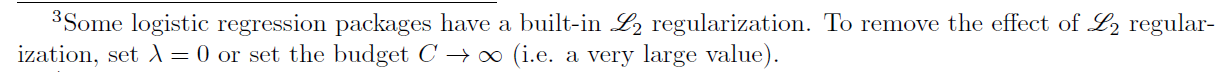


#### i. Plots
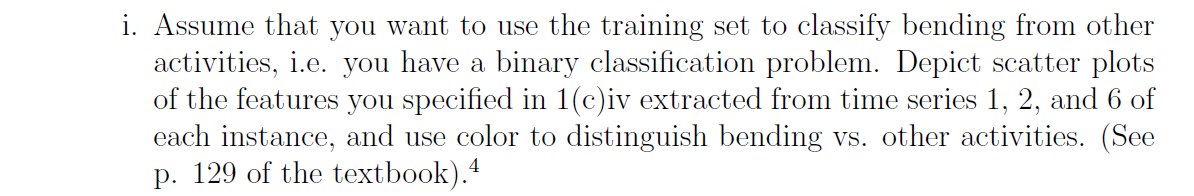

```
4 = You are welcome to repeat this experiment with other features as well as with time series 3, 4, and 5 in
each instance.
```

In [8]:
Selected_Data = Final_stats[['mean₁', 'standard deviation₁', '3rd quart₁', 'mean₂', 'standard deviation₂', '3rd quart₂', 'mean₆', 'standard deviation₆', '3rd quart₆']] #selected 1,2, and 6 features 
Selected_Data

gl1 = len(glob("../data/AReM/bending1/*.csv"))
gl2 = len(glob("../data/AReM/bending2/*.csv"))
glbending = gl1 + gl2
leftout = len(Selected_Data) - glbending
Bending_L = ['Bending']*glbending #13 bending csv
All_Other = ['All_Others']*leftout
#len(All_Other)
new_clmn_data = Bending_L + All_Other
Selected_Data['Activity'] = new_clmn_data
Selected_Data.columns = ['mean_1', 'standard deviation_1', '3rd quart_1', 'mean_2', 'standard deviation_2', '3rd quart_2', 'mean_6', 'standard deviation_6', '3rd quart_6', 'Activity'] 
Selected_Data

mean_1  standard deviation_1  3rd quart_1  mean_2  \
Instance                                                      
1          40.62                 1.477        42.00    0.36   
2          42.81                 1.436        43.67    0.37   
3          43.95                 1.559        45.00    0.43   
4          42.18                 3.671        45.00    0.70   
5          41.68                 2.243        42.75    0.54   
...          ...                   ...          ...     ...   
84         33.59                 4.651        37.00    4.58   
85         34.32                 4.752        38.00    4.46   
86         34.55                 4.842        37.81    4.37   
87         34.87                 4.532        38.25    4.38   
88         34.47                 4.797        38.00    4.36   

          standard deviation_2  3rd quart_2  mean_6  standard deviation_6  \
Instance                                                                    
1                        0.323         0.50    0.57                 0.583   
2                        0.289         0.50    0.57                 0.601   
3                        0.339         0.50    0.49                 0.514   
4                        0.631         1.12    0.61                 0.524   
5                        0.405         0.71    0.38                 0.389   
...                        ...          ...     ...                   ...   
84                       2.461         6.10    3.26                 1.640   
85                       2.599         5.97    3.43                 1.733   
86                       2.360         5.80    3.34                 1.657   
87                       2.435         5.93    3.42                 1.691   
88                       2.389         5.90    3.34                 1.699   

          3rd quart_6    Activity  
Instance                           
1                1.30     Bending  
2                1.30     Bending  
3                0.94     Bending  
4                1.00     Bending  
5                0.50     Bending  
...               ...         ...  
84               4.32  All_Others  
85               4.56  All_Others  
86               4.34  All_Others  
87               4.50  All_Others  
88               4.38  All_Others  

[88 rows x 10 columns]

In [9]:
Selected_Training_dflist = [Selected_Data.iloc[2:7,:], Selected_Data.iloc[9:13,:], Selected_Data.iloc[16:28,:], Selected_Data.iloc[31:43,:],
                          Selected_Data.iloc[46:58,:], Selected_Data.iloc[61:73,:], Selected_Data.iloc[76:88,:]]
Selected_Training_df = pd.concat(Selected_Training_dflist, axis=0)
Selected_Training_df

mean_1  standard deviation_1  3rd quart_1  mean_2  \
Instance                                                      
3          43.95                 1.559        45.00    0.43   
4          42.18                 3.671        45.00    0.70   
5          41.68                 2.243        42.75    0.54   
6          43.45                 1.386        45.00    0.38   
7          43.97                 1.618        44.67    0.41   
...          ...                   ...          ...     ...   
84         33.59                 4.651        37.00    4.58   
85         34.32                 4.752        38.00    4.46   
86         34.55                 4.842        37.81    4.37   
87         34.87                 4.532        38.25    4.38   
88         34.47                 4.797        38.00    4.36   

          standard deviation_2  3rd quart_2  mean_6  standard deviation_6  \
Instance                                                                    
3                        0.339         0.50    0.49                 0.514   
4                        0.631         1.12    0.61                 0.524   
5                        0.405         0.71    0.38                 0.389   
6                        0.316         0.50    0.68                 0.623   
7                        0.263         0.50    0.56                 0.488   
...                        ...          ...     ...                   ...   
84                       2.461         6.10    3.26                 1.640   
85                       2.599         5.97    3.43                 1.733   
86                       2.360         5.80    3.34                 1.657   
87                       2.435         5.93    3.42                 1.691   
88                       2.389         5.90    3.34                 1.699   

          3rd quart_6    Activity  
Instance                           
3                0.94     Bending  
4                1.00     Bending  
5                0.50     Bending  
6                0.87     Bending  
7                0.83     Bending  
...               ...         ...  
84               4.32  All_Others  
85               4.56  All_Others  
86               4.34  All_Others  
87               4.50  All_Others  
88               4.38  All_Others  

[69 rows x 10 columns]

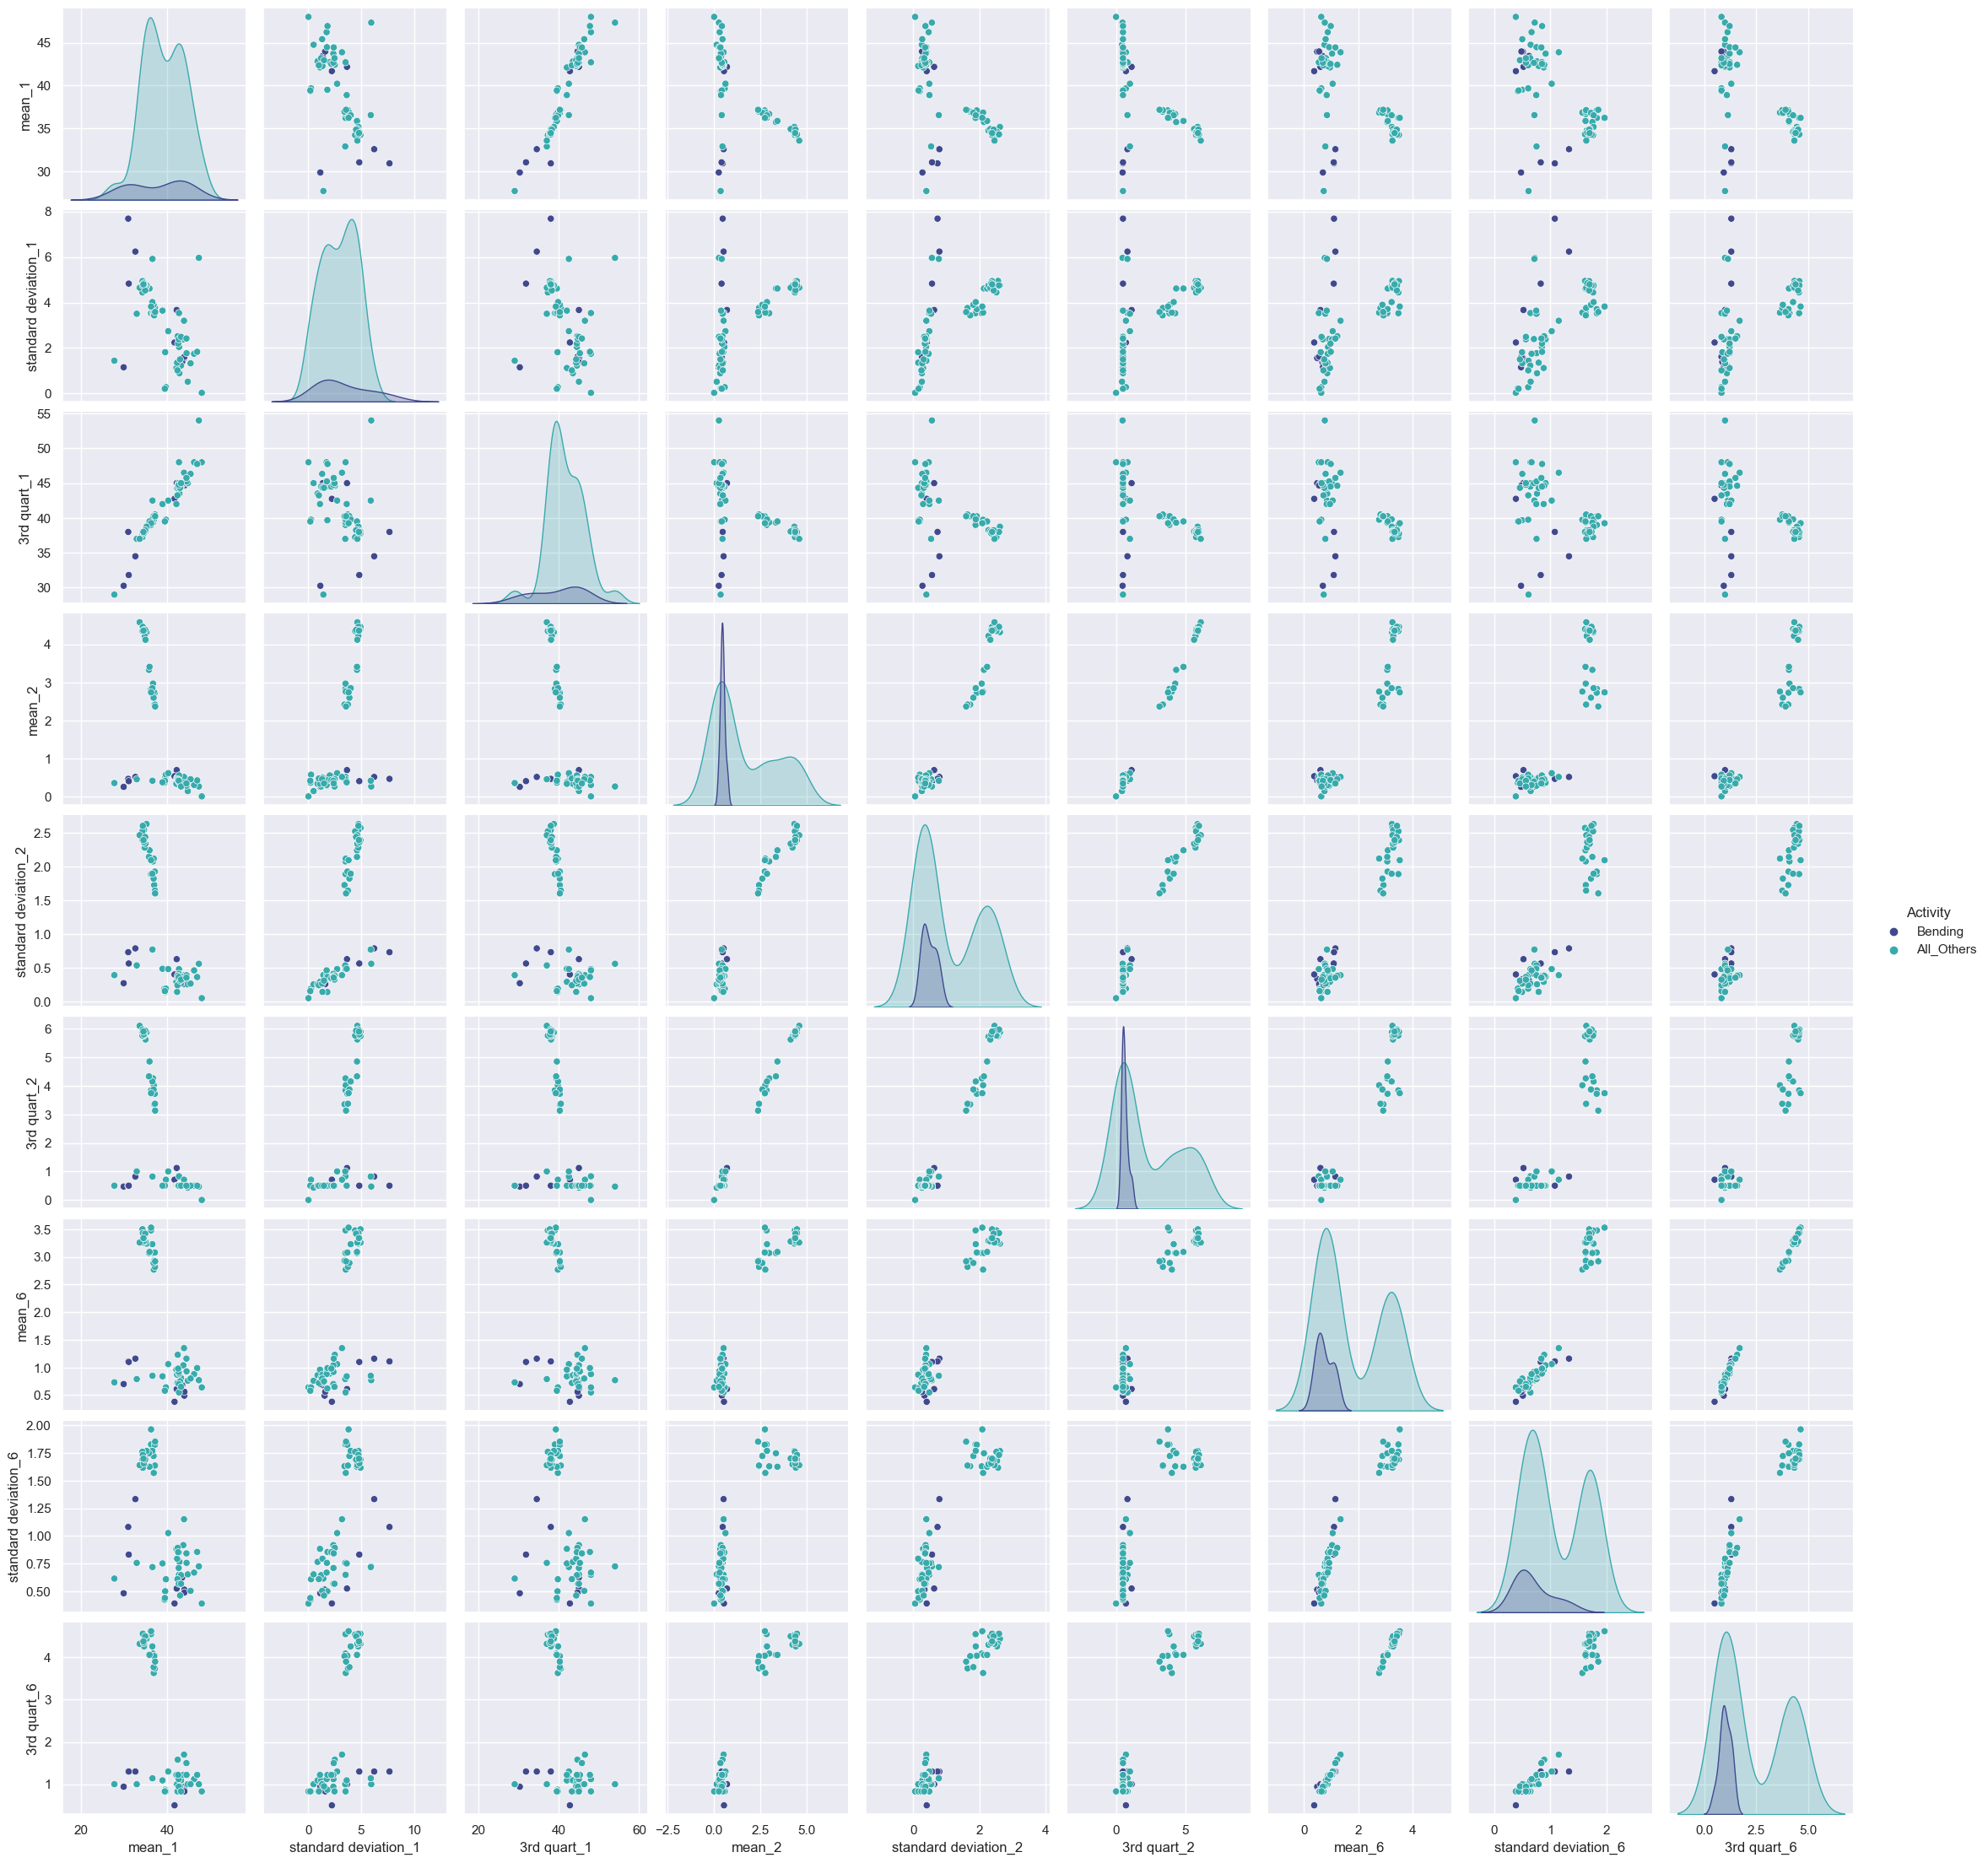

In [10]:
sns.set(rc={'figure.figsize':(11,8)})
sns.pairplot(Selected_Training_df , hue = 'Activity' , kind = 'scatter' , palette="mako")

#### ii. Splitted Plots
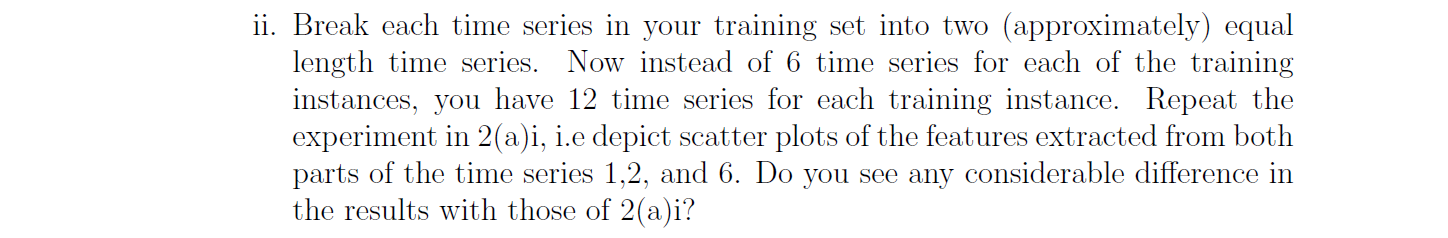

In [11]:
def split_by_2parts(path):
    df = pd.read_csv(path, skiprows=4)
    mid = len(df)//2
    first_half = df.iloc[:mid,1:]
    second_half = df.iloc[mid:,1:]
    second_half.reset_index(drop=True, inplace=True)
    second_half.columns = ['avg_rss12_2', 'var_rss12_2', 'avg_rss13_2', 'var_rss13_2', 'avg_rss23_2','var_rss23_2']
    df_new = pd.concat([first_half, second_half], axis=1)
    return df_new

In [12]:
df_new_instance = []
for ele in ['bending1','bending2','cycling','lying','sitting','standing','walking']: #for loop for all folders
    dflist = []
    regex = re.compile("\d+")
    gl = glob(f"../data/AReM/{ele}/*.csv") #list of csv file relative path for specific element/folders. 
    files = [x.replace('\\','/') for x in gl]
    files.sort(key=lambda x: int(regex.search(x).group())) #sort files based on integer number like dataset1.csv then dataset2.csv 
    #print(files)
    for file in files:
        dftemp = split_by_2parts(file) #intp two parts and merged
        dflist.append(dftemp)
    df_new_instance.append(dflist)
len(df_new_instance)

7

In [13]:
#df_new_instance is the list of df of all instance

In [14]:
#Checking Splitted dataset list for one instance bending2 
print(len(df_new_instance[1]))
df_new_instance[1]

6


[     avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
 0        23.75       0.43      24.00       0.00      24.67       0.47   
 1        22.67       0.94      24.00       0.00      24.67       0.94   
 2        21.33       0.47      24.00       0.00      24.75       0.83   
 3        21.00       0.00      24.00       0.00      25.25       1.09   
 4        23.00       0.71      23.75       0.43      24.75       0.83   
 ..         ...        ...        ...        ...        ...        ...   
 235      24.75       0.43      18.00       0.00      27.00       0.00   
 236      24.67       0.47      18.00       0.00      27.00       0.00   
 237      25.00       0.00      18.67       0.47      27.00       0.00   
 238      24.75       0.43      19.00       0.00      27.00       0.00   
 239      24.25       0.43      19.75       0.43      26.75       0.43   
 
      avg_rss12_2  var_rss12_2  avg_rss13_2  var_rss13_2  avg_rss23_2  \
 0          24.25         0.43       

In [15]:
def stats_df(df_new_instance):
    Df_Stats_Instance = []
    #print(len(df_new_instance))
    new_clmn = []
    for i in range(1,13):
        new_clmn.append(f'mean{i}')
        new_clmn.append(f'standard deviation{i}')
        new_clmn.append(f'3rd quart{i}')
    for activity in df_new_instance:
        #print('-',len(activity))
        for df in activity:
            Aggr_data = []
            data = []
            #print('--',df.shape)
            for clmn in df.columns: #this loop is for appending stats of a column from a dataset
                mean = round(df[clmn].mean(),2)
                std = round(df[clmn].std(),3)
                third_q = round(np.quantile(df[clmn],0.75),2)
                templist = [mean,std,third_q]
                data.append(templist)
                #print(templist)
            Aggr_data = [element for sublist in data for element in sublist]
            #print(Aggr_data)
            #print(len(Aggr_data))
            #Instance_DF = pd.DataFrame(Aggr_data, columns=new_clmn)
            Df_Stats_Instance.append(Aggr_data)
    Instance_DF = pd.DataFrame(Df_Stats_Instance, columns=new_clmn)
    return Instance_DF

Instance_DF = stats_df(df_new_instance)  
Instance_DF['Activity'] = new_clmn_data
Instance_DF.insert(loc=0, column='Instance', value=pd.Series(range(1, len(Instance_DF) + 1)))
Instance_DF = Instance_DF.set_index('Instance')
Instance_DF

mean1  standard deviation1  3rd quart1  mean2  standard deviation2  \
Instance                                                                       
1         40.95                1.103       42.00   0.38                0.328   
2         42.64                0.642       43.33   0.36                0.258   
3         44.06                1.557       45.00   0.38                0.330   
4         43.28                3.473       45.25   0.67                0.634   
5         41.62                3.119       44.25   0.62                0.490   
...         ...                  ...         ...    ...                  ...   
84        33.33                4.874       36.81   4.41                2.196   
85        34.04                4.873       37.75   4.78                2.763   
86        34.03                4.759       37.50   4.57                2.392   
87        34.92                4.272       37.81   4.18                2.342   
88        34.92                4.634       38.25   4.26                2.397   

          3rd quart2  mean3  standard deviation3  3rd quart3  mean4  ...  \
Instance                                                             ...   
1               0.50  17.67                4.063       20.25   0.59  ...   
2               0.50  20.37                2.693       21.50   0.64  ...   
3               0.50  23.10                2.411       24.00   0.49  ...   
4               1.00  23.14                3.123       24.81   0.81  ...   
5               0.83  19.08                5.103       24.00   1.12  ...   
...              ...    ...                  ...         ...    ...  ...   
84              5.87  15.45                2.901       17.31   3.27  ...   
85              6.51  15.18                2.755       17.00   3.39  ...   
86              6.03  15.34                2.810       17.25   3.03  ...   
87              5.46  15.52                2.845       17.06   3.24  ...   
88              5.42  15.34                2.881       17.50   3.25  ...   

          mean10  standard deviation10  3rd quart10  mean11  \
Instance                                                      
1           1.08                 1.039         1.42   34.12   
2           1.11                 1.128         1.50   32.30   
3           0.50                 0.599         0.71   34.88   
4           1.17                 1.079         1.48   30.97   
5           0.57                 0.456         0.83   29.64   
...          ...                   ...          ...     ...   
84          3.18                 1.655         4.32   15.76   
85          3.16                 1.479         4.06   15.52   
86          3.03                 1.645         3.98   15.22   
87          3.18                 1.483         4.15   15.94   
88          3.13                 1.565         3.96   15.64   

          standard deviation11  3rd quart11  mean12  standard deviation12  \
Instance                                                                    
1                        2.838        36.50    0.55                 0.510   
2                        2.284        33.75    0.53                 0.575   
3                        2.299        36.25    0.39                 0.479   
4                        3.760        33.75    0.59                 0.492   
5                        2.063        30.56    0.35                 0.363   
...                        ...          ...     ...                   ...   
84                       3.232        18.06    3.29                 1.646   
85                       3.162        17.75    3.32                 1.758   
86                       2.660        17.25    3.43                 1.691   
87                       3.164        18.06    3.42                 1.599   
88                       3.247        17.50    3.24                 1.658   

          3rd quart12    Activity  
Instance                           
1                0.94     Bending  
2                0.87     Bending  
3             

In [16]:
Training_inst = [Instance_DF.iloc[2:7,:], Instance_DF.iloc[9:13,:], Instance_DF.iloc[16:28,:], Instance_DF.iloc[31:43,:],
                          Instance_DF.iloc[46:58,:], Instance_DF.iloc[61:73,:], Instance_DF.iloc[76:88,:]]
Instance_Training_DF = pd.concat(Training_inst, axis=0)

In [17]:
#selecting stats of only 1,2, and 6
Final_Selected_train_stat = Instance_Training_DF[['mean1', 'standard deviation1', '3rd quart1', 'mean2','standard deviation2', '3rd quart2', 'mean6', 'standard deviation6','3rd quart6',
                                                  'mean7', 'standard deviation7', '3rd quart7', 'mean8','standard deviation8', '3rd quart8', 'mean12', 'standard deviation12','3rd quart12','Activity']]  
Final_Selected_train_stat

mean1  standard deviation1  3rd quart1  mean2  standard deviation2  \
Instance                                                                       
3         44.06                1.557       45.00   0.38                0.330   
4         43.28                3.473       45.25   0.67                0.634   
5         41.62                3.119       44.25   0.62                0.490   
6         44.12                1.360       45.00   0.25                0.314   
7         43.49                1.282       44.50   0.38                0.284   
...         ...                  ...         ...    ...                  ...   
84        33.33                4.874       36.81   4.41                2.196   
85        34.04                4.873       37.75   4.78                2.763   
86        34.03                4.759       37.50   4.57                2.392   
87        34.92                4.272       37.81   4.18                2.342   
88        34.92                4.634       38.25   4.26                2.397   

          3rd quart2  mean6  standard deviation6  3rd quart6  mean7  \
Instance                                                              
3               0.50   0.60                0.527        1.00  43.85   
4               1.00   0.64                0.555        1.22  41.08   
5               0.83   0.42                0.411        0.71  41.73   
6               0.50   0.82                0.718        1.12  42.79   
7               0.50   0.52                0.487        0.83  44.45   
...              ...    ...                  ...         ...    ...   
84              5.87   3.23                1.637        4.24  33.84   
85              6.51   3.54                1.703        4.79  34.61   
86              6.03   3.24                1.620        4.15  35.06   
87              5.46   3.43                1.782        4.58  34.83   
88              5.42   3.44                1.737        4.51  34.03   

          standard deviation7  3rd quart7  mean8  standard deviation8  \
Instance                                                                
3                       1.557       45.00   0.47                0.342   
4                       3.537       44.50   0.72                0.628   
5                       0.596       42.00   0.45                0.273   
6                       1.059       43.00   0.51                0.261   
7                       1.771       44.75   0.45                0.235   
...                       ...         ...    ...                  ...   
84                      4.412       37.00   4.75                2.694   
85                      4.621       38.25   4.13                2.387   
86                      4.881       38.33   4.17                2.316   
87                      4.786       38.27   4.58                2.514   
88                      4.924       38.00   4.46                2.382   

          3rd quart8  mean12  standard deviation12  3rd quart12    Activity  
Instance                                                                     
3               0.50    0.39                 0.479         0.71     Bending  
4               1.23    0.59                 0.492         0.87     Bending  
5               0.50    0.35                 0.363         0.50     Bending  
6               0.50    0.54                 0.473         0.71     Bending  
7               0.50    0.59                 0.488         0.83     Bending  
...              ...     ...                   ...          ...         ...  
84              6.45    3.29                 1.646         4.45  All_Others  
85              5.42    3.32                 1.758         4.39  All_Others  
86              5.59    3.43                 1.691         4.51  All_Others  
87              6.24    3.42                 1.599         4.45  All_Others  
88              6.02    3.24                 1.658         4.30  All_Others  

[69 rows x 19 columns]

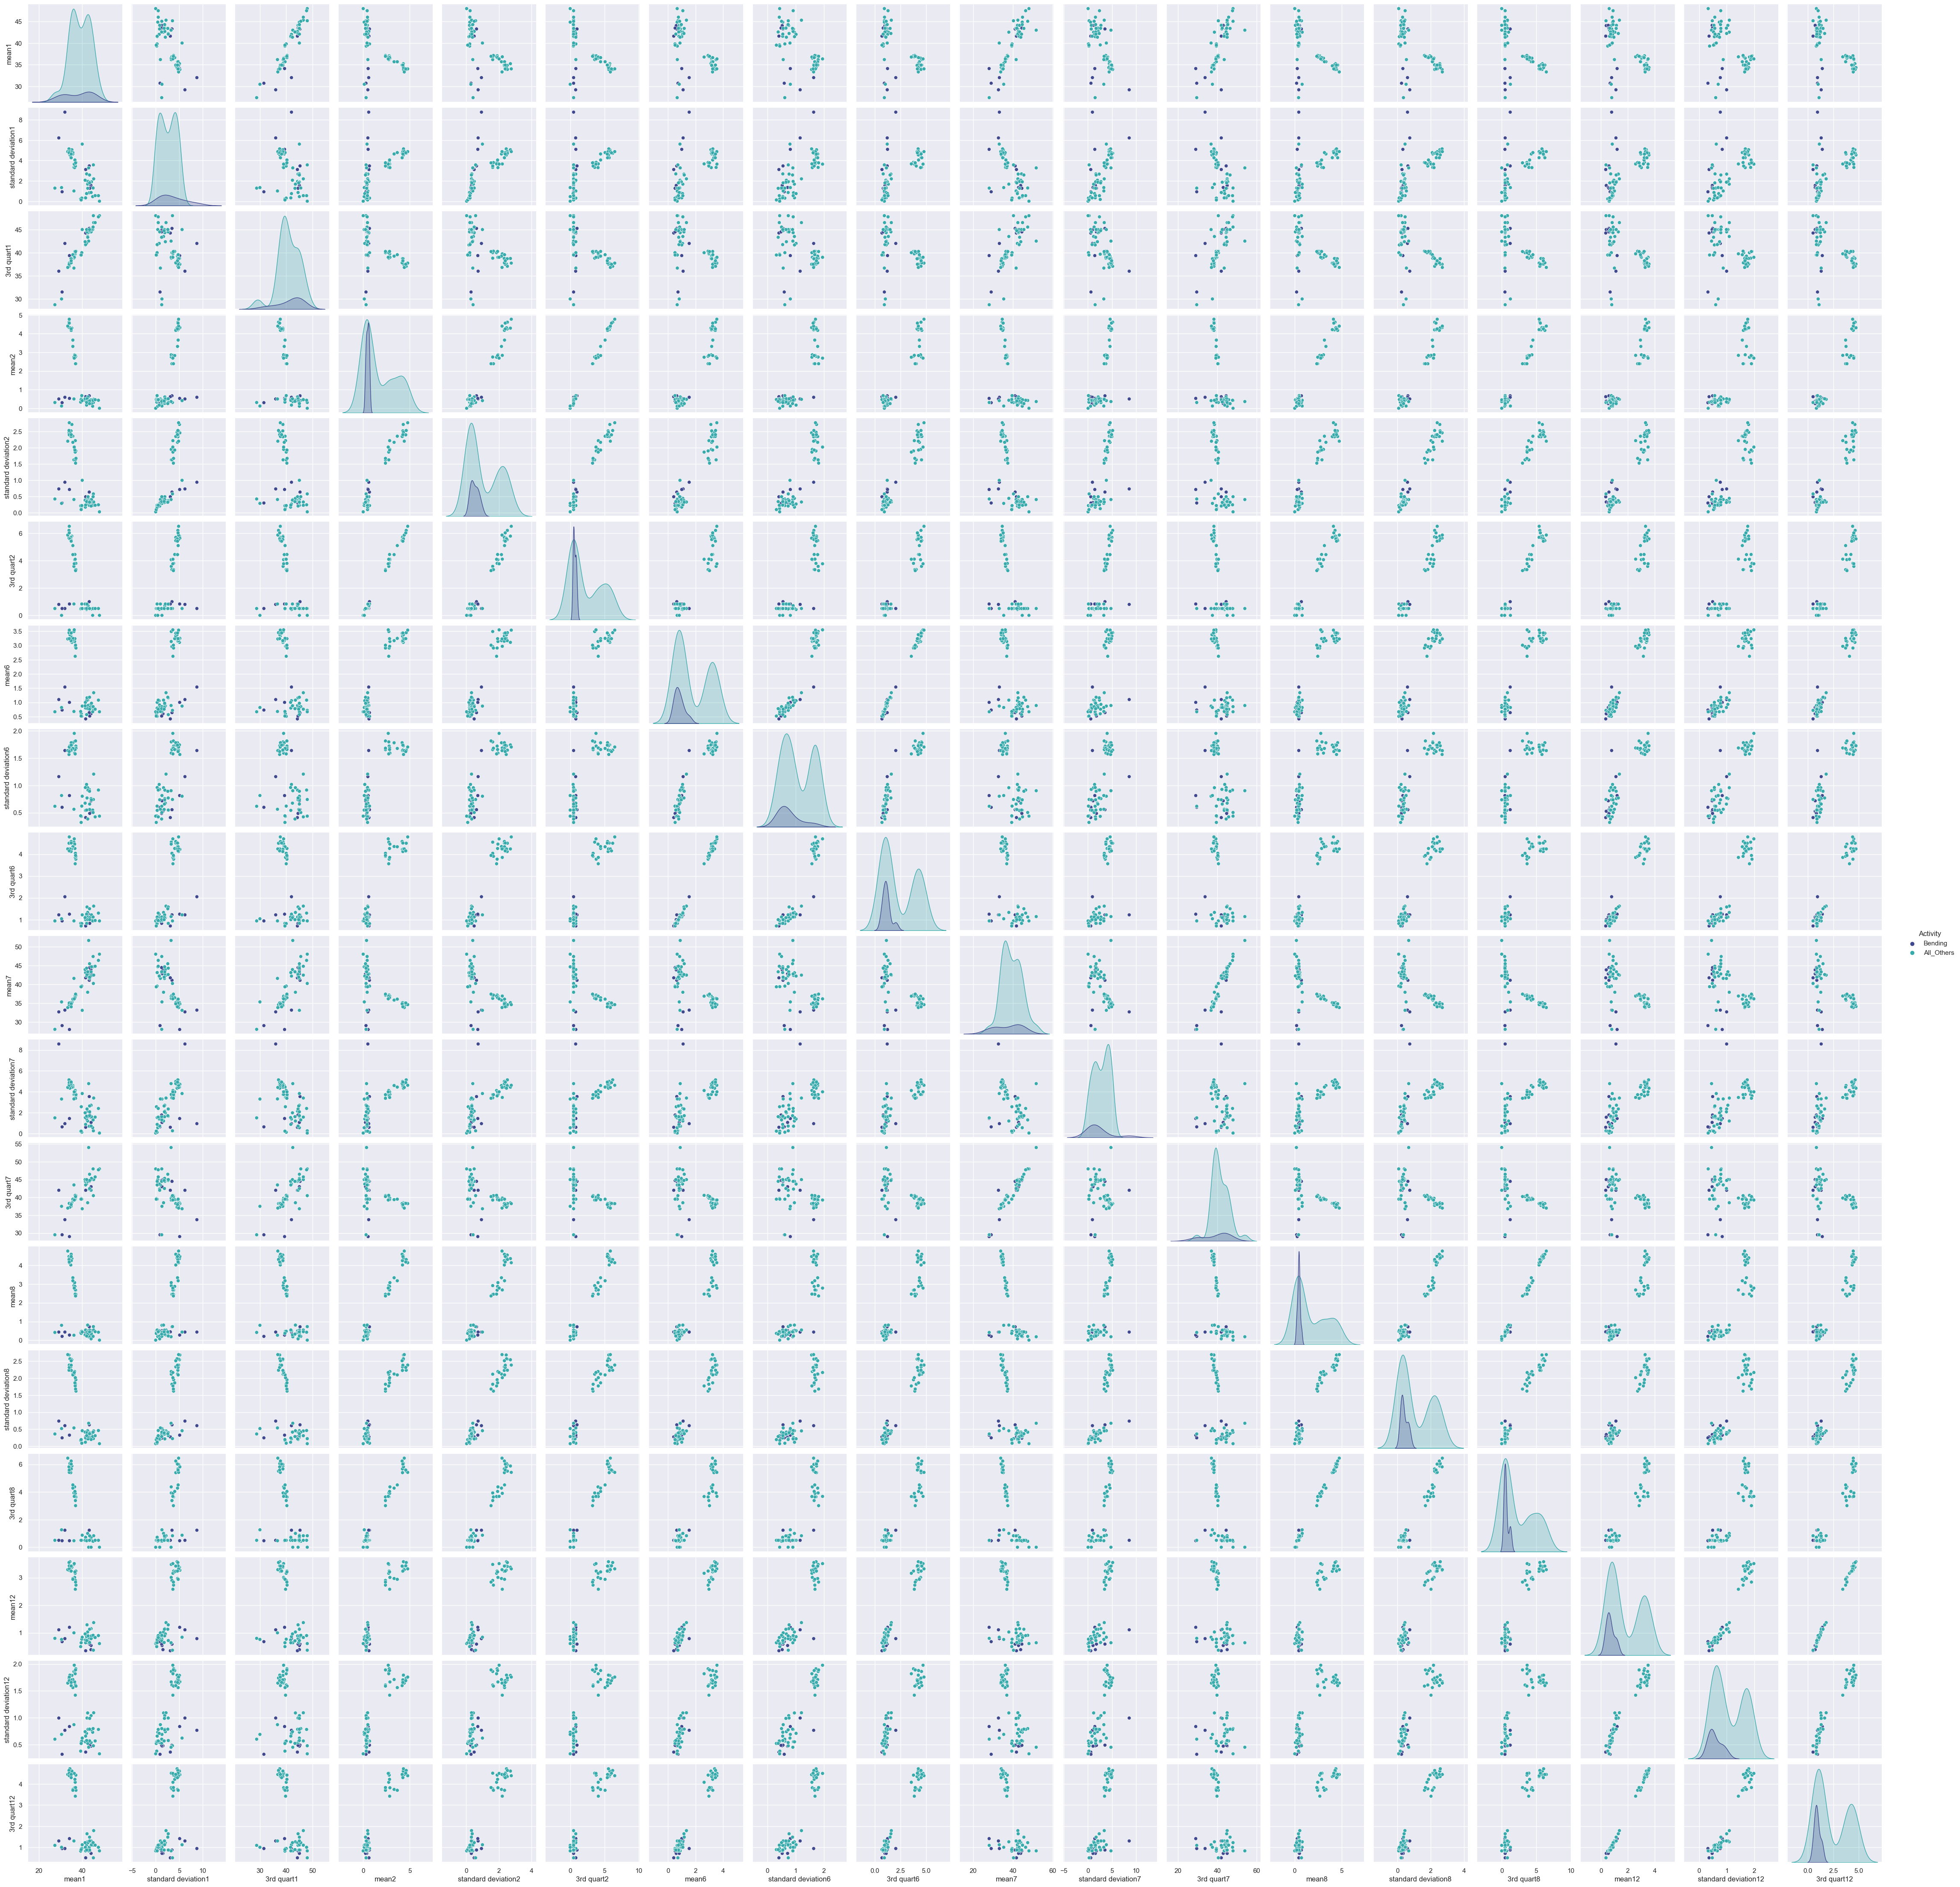

In [18]:
sns.set(rc={'figure.figsize':(11,8)})
sns.pairplot(Final_Selected_train_stat , diag_kind="kde", hue = 'Activity' , kind = 'scatter' , palette="mako")
plt.show()

```
Upon splitting each time series into two equal-length segments, a noticeable improvement in the separability of the bending and non-bending classes can be observed on the scatterplot, making it more comprehensible visually. But still there is no major difference between the two
```

#### iii. Time Series Segments

Break each time series in your training set into l ∊ {1, 2, ... , 20} time series
of approximately equal length and use logistic regression5 to solve the binary
classification problem, using time-domain features. Remember that breaking
each of the time series does not change the number of instances. It only
changes the number of features for each instance. Calculate the p-values for
your logistic regression parameters in each model corresponding to each value
of l and refit a logistic regression model using your pruned set of features.6
Alternatively, you can use backward selection using sklearn.feature selection
or glm in R. Use 5-fold cross-validation to determine the best value of the pair
(l, p), where p is the number of features used in recursive feature elimination.
Explain what the right way and the wrong way are to perform cross-validation
in this problem.7 Obviously, use the right way! Also, you may encounter the
problem of class imbalance, which may make some of your folds not having
any instances of the rare class. In such a case, you can use stratified cross
validation. Research what it means and use it if needed.
In the following, you can see an example of applying Python's Recursive Feature Elimination, which is a backward selection algorithm, to logistic regression.
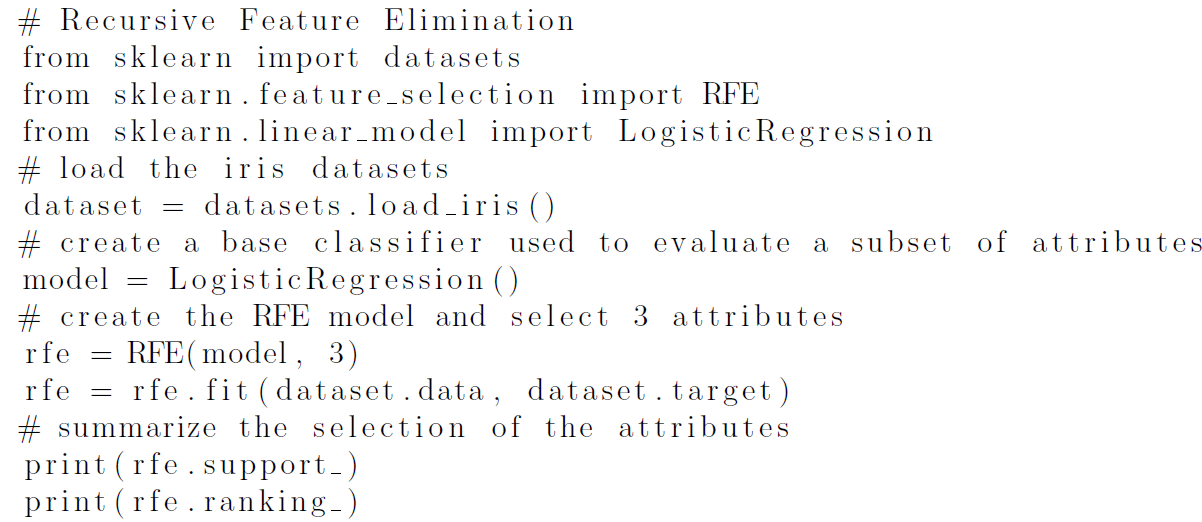

In [19]:
Full_data.tail()

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
42714  118750      34.50       6.18       9.00       3.56      12.67   
42715  119000      25.75       6.02      13.75       2.05      16.00   
42716  119250      31.50       3.35      10.25       5.12      16.25   
42717  119500      33.75       2.77      14.00       3.24      13.75   
42718  119750      37.00       1.41      18.25       3.70      11.00   

       var_rss23  
42714       4.19  
42715       1.58  
42716       2.95  
42717       0.43  
42718       4.32

In [20]:
%%time
l_trainSet, l_fullSet = {},{}

for l in range(1, 21):
    min_list, max_list, mean_list, median_list, std_list, first_quart_list, third_quart_list = [], [], [], [], [], [], []
    temp, i = 480, 0 #there are 480 rows in each dataset
    while i < 42240:
        end = (480//l)+i
        min_list.append(Full_data.iloc[i:end, 1:7].min(axis = 0))  
        max_list.append(Full_data.iloc[i:end, 1:7].max(axis = 0))
        mean_list.append(Full_data.iloc[i:end, 1:7].mean(axis = 0))
        median_list.append(Full_data.iloc[i:end, 1:7].median(axis = 0))
        std_list.append(Full_data.iloc[i:end, 1:7].std(axis = 0))
        first_quart_list.append(Full_data.iloc[i:end, 1:7].quantile(q=0.25, axis=0, interpolation='midpoint'))
        third_quart_list.append(Full_data.iloc[i:end, 1:7].quantile(q=0.75, axis=0, interpolation='midpoint'))
        i += (480//l)
        if ((temp-i)//(480//l) == 0):
            i = i + (temp-i)
            temp += 480
            
    mindf = pd.DataFrame(data=np.asarray(min_list), columns=["min1", "min2", "min3", "min4", "min5", "min6"])
    maxdf = pd.DataFrame(data=np.asarray(max_list), columns=["max1", "max2", "max3", "max4", "max5", "max6"])
    meandf = pd.DataFrame(data=np.asarray(mean_list),columns=["mean1", "mean2", "mean3", "mean4", "mean5", "mean6"])
    mediandf = pd.DataFrame(data=np.asarray(median_list),columns=["median1", "median2", "median3", "median4", "median5", "median6"])
    stddf = pd.DataFrame(data=np.asarray(std_list), columns=["std1", "std2", "std3", "std4", "std5", "std6"])
    first_quartdf = pd.DataFrame(data=np.asarray(first_quart_list), columns=["first_quart1", "first_quart2", "first_quart3","first_quart4", "first_quart5", "first_quart6"])
    third_quartdf = pd.DataFrame(data=np.asarray(third_quart_list), columns=["third_quart1", "third_quart2", "third_quart3","third_quart4", "third_quart5", "third_quart6"]) 
    
    l_fullSet[l] = pd.concat([mindf, maxdf, meandf, mediandf, stddf, first_quartdf, third_quartdf], axis=1)
    # Reorder the columns in order to appear as requested from the question
    cols = ['min1', 'max1', 'mean1', 'median1', 'std1', 'first_quart1', 'third_quart1',
           'min2', 'max2', 'mean2', 'median2', 'std2', 'first_quart2', 'third_quart2',
           'min3', 'max3', 'mean3', 'median3', 'std3', 'first_quart3', 'third_quart3',
           'min4', 'max4', 'mean4', 'median4', 'std4', 'first_quart4', 'third_quart4',
           'min5', 'max5', 'mean5', 'median5', 'std5', 'first_quart5', 'third_quart5',
           'min6', 'max6', 'mean6', 'median6', 'std6', 'first_quart6', 'third_quart6']
    l_fullSet[l] = l_fullSet[l][cols]
    
    gl1 = len(glob("../data/AReM/bending1/*.csv"))
    gl2 = len(glob("../data/AReM/bending2/*.csv"))
    glbending = gl1 + gl2 #13
    leftout = len(Selected_Data) - glbending
    new_clmn = []
    
    for i in range (0,l*glbending):
        new_clmn.append('bending')
    for i in range (0,l*leftout):
        new_clmn.append('all_others')
        
    l_fullSet[l]['Activity'] = new_clmn
    trainingSetL = [l_fullSet[l].iloc[l*2:l*7, :], l_fullSet[l].iloc[l*9:l*13, :], l_fullSet[l].iloc[l*16:l*28, :], l_fullSet[l].iloc[l*31:l*43, :],
            l_fullSet[l].iloc[l*46:l*58, :], l_fullSet[l].iloc[l*61:l*73, :], l_fullSet[l].iloc[l*76:l*88, :]]
    l_trainSet[l] = pd.concat(trainingSetL, axis=0)     

Wall time: 1min


In [21]:
l_fullSet[4]

min1   max1      mean1  median1      std1  first_quart1  third_quart1  \
0    39.00  42.33  41.285500   41.750  0.921003        40.750        42.000   
1    38.00  42.00  40.608417   40.500  1.167854        40.000        42.000   
2    37.25  40.75  39.134250   39.000  0.486759        39.000        39.330   
3    38.33  45.00  41.471000   42.000  1.711348        39.550        42.750   
4    41.75  44.25  43.149917   43.330  0.526099        42.670        43.500   
..     ...    ...        ...      ...       ...           ...           ...   
347  20.25  46.00  34.747167   35.500  4.691528        31.625        37.710   
348  24.33  43.50  34.767083   35.250  4.265811        32.250        37.000   
349  24.50  44.00  35.082833   36.000  4.285048        32.125        38.250   
350  23.50  46.25  34.741583   35.125  4.949134        31.415        38.250   
351  24.50  44.00  34.953500   35.375  4.637375        32.000        38.585   

     min2   max2     mean2  ...  first_quart5  third_quart5  min6  max6  \
0    0.00   1.00  0.320917  ...        33.000        34.500  0.00  1.50   
1    0.00   1.22  0.430417  ...        34.500        36.000  0.00  1.50   
2    0.00   1.30  0.327917  ...        36.000        37.000  0.00  1.92   
3    0.00   1.30  0.355167  ...        30.000        33.000  0.00  1.87   
4    0.00   0.94  0.524500  ...        32.500        34.000  0.00  1.50   
..    ...    ...       ...  ...           ...           ...   ...   ...   
347  0.00  12.28  4.234500  ...        13.330        17.250  0.00  8.64   
348  0.00  14.82  4.473250  ...        13.585        17.585  0.00  9.18   
349  0.00   9.42  3.910333  ...        13.250        18.250  0.43  8.44   
350  0.82  12.26  4.623667  ...        14.000        18.290  0.00  9.51   
351  0.43  11.02  4.558083  ...        13.875        17.750  0.47  7.18   

        mean6  median6      std6  first_quart6  third_quart6    Activity  
0    0.588333    0.000  0.642493         0.000         1.300     bending  
1    0.589667    0.000  0.655868         0.000         1.300     bending  
2    0.677750    0.755  0.509278         0.430         1.000     bending  
3    0.426583    0.430  0.481900         0.000         0.500     bending  
4    0.407583    0.000  0.537489         0.000         0.500     bending  
..        ...      ...       ...           ...           ...         ...  
347  3.550917    3.500  1.683439         2.335         4.715  all_others  
348  3.372917    3.065  1.773564         2.165         4.665  all_others  
349  3.508917    3.340  1.822397         2.160         4.550  all_others  
350  3.297750    3.270  1.631141         2.050         4.225  all_others  
351  3.517167    3.560  1.530879         2.315         4.500  all_others  

[352 rows x 43 columns]

In [22]:
l_trainSet[4]

min1   max1      mean1  median1      std1  first_quart1  third_quart1  \
8    38.75  45.00  43.629667   44.330  1.366867        42.250        44.500   
9    36.50  46.50  44.484667   45.000  1.622277        44.000        45.290   
10   35.00  47.00  44.182167   45.000  1.894368        43.415        45.125   
11   42.33  47.40  43.521500   43.330  1.030153        42.750        43.585   
12   35.75  47.75  43.995000   45.000  2.916867        43.750        45.415   
..     ...    ...        ...      ...       ...           ...           ...   
347  20.25  46.00  34.747167   35.500  4.691528        31.625        37.710   
348  24.33  43.50  34.767083   35.250  4.265811        32.250        37.000   
349  24.50  44.00  35.082833   36.000  4.285048        32.125        38.250   
350  23.50  46.25  34.741583   35.125  4.949134        31.415        38.250   
351  24.50  44.00  34.953500   35.375  4.637375        32.000        38.585   

     min2   max2     mean2  ...  first_quart5  third_quart5  min6  max6  \
8    0.00   1.50  0.374333  ...        36.000        36.500  0.00  1.50   
9    0.00   1.48  0.387750  ...        36.000        37.750  0.00  1.79   
10   0.00   1.70  0.424000  ...        31.000        36.000  0.00  1.50   
11   0.00   1.00  0.518917  ...        36.000        36.330  0.00  1.50   
12   0.00   3.00  0.508083  ...        36.000        37.500  0.00  1.50   
..    ...    ...       ...  ...           ...           ...   ...   ...   
347  0.00  12.28  4.234500  ...        13.330        17.250  0.00  8.64   
348  0.00  14.82  4.473250  ...        13.585        17.585  0.00  9.18   
349  0.00   9.42  3.910333  ...        13.250        18.250  0.43  8.44   
350  0.82  12.26  4.623667  ...        14.000        18.290  0.00  9.51   
351  0.43  11.02  4.558083  ...        13.875        17.750  0.47  7.18   

        mean6  median6      std6  first_quart6  third_quart6    Activity  
8    0.417417    0.430  0.458411         0.000         0.665     bending  
9    0.779083    0.940  0.530069         0.450         1.300     bending  
10   0.504167    0.430  0.524298         0.000         0.940     bending  
11   0.272500    0.000  0.397433         0.000         0.470     bending  
12   0.694667    0.830  0.531478         0.000         1.170     bending  
..        ...      ...       ...           ...           ...         ...  
347  3.550917    3.500  1.683439         2.335         4.715  all_others  
348  3.372917    3.065  1.773564         2.165         4.665  all_others  
349  3.508917    3.340  1.822397         2.160         4.550  all_others  
350  3.297750    3.270  1.631141         2.050         4.225  all_others  
351  3.517167    3.560  1.530879         2.315         4.500  all_others  

[276 rows x 43 columns]

Correct way to cross validate
Cross validate both before selecting the predictors and while classification using them

In [23]:
%%time
logreg_model = LogisticRegression(solver='liblinear', C=sys.maxsize)
CVErrors = []
for l in range(1, 21):
    #print(l,"l loop")
    X = l_trainSet[l].iloc[:, 0:42]
    y = l_trainSet[l].iloc[:, 42:43]
    y = np.ravel(y)
    for p_n in range(1, 43):
        #print(p_n,"p_n loop")
        skf = StratifiedKFold(n_splits=5, shuffle=True)
        skf.get_n_splits(X)
        L_5Fold = []
        for train_index, test_index in skf.split(X,y):
            #print(train_index,"ti loop")
            X_train, X_test = X.values[train_index], X.values[test_index]
            X_train = pd.DataFrame(data=X_train,index=None,columns=cols)
            X_test = pd.DataFrame(data=X_test,index=None,columns=cols)
            y_train, y_test = y[train_index], y[test_index]
            rfe = RFE(estimator=logreg_model, n_features_to_select=p_n) 
            rfe = rfe.fit(X_train, y_train)
            Selected_features = [] 
            for i in range(0, 42):
                #print(i,"i loop")
                if (rfe.ranking_[i] == 1):
                    Selected_features.append(i) 
            X_train = X_train.iloc[:, Selected_features]
            X_test = X_test.iloc[:, Selected_features]
            logreg_model.fit(X_train, y_train)
            L_5Fold.append(1 - logreg_model.score(X_test, y_test))
        CVErrors.append(sum(L_5Fold) / len(L_5Fold))
print('Stratified 5-fold Cross Validation')
CVError_arr = np.asarray(CVErrors)
CVError_arr = CVError_arr.reshape(20,42)
CVError_index = np.unravel_index(np.argmin(CVError_arr, axis=None), CVError_arr.shape)
print(f"CV Error is minimum at l = {CVError_index[0] + 1}")
print(f"The best number of features selected is : number of features = {CVError_index[1] + 1}")
print(f"Cross Validation error for l = {CVError_index[0] + 1}: {min(CVErrors)}")

Stratified 5-fold Cross Validation
CV Error is minimum at l = 1
The best number of features selected is : number of features = 15
Cross Validation error for l = 1: 0.0
Wall time: 22min 6s


#### iv. Confusion Matrix, ROC and AUC

In [24]:
# Now we have best l=1, so now re-train our model using the whole training data and re-applying the feature selection process

l = CVError_index[0] + 1 #From above
X_train = l_trainSet[l].iloc[:, 0:42]
y_train = l_trainSet[l].iloc[:, 42:43]
y_train = np.ravel(y_train) 
logreg_model = LogisticRegression(solver='liblinear', C=sys.maxsize)
rfe = RFE(estimator=logreg_model, n_features_to_select = CVError_index[1] + 1) 
rfe = rfe.fit(X_train, y_train)

Selected_features = []
for i in range(0, 42):
    if (rfe.ranking_[i] == 1):
        Selected_features.append(i)
X_train = X_train.iloc[:, Selected_features]

logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_train)

print("Confusion Matrix\n")
print(metrics.confusion_matrix(y_train, y_pred))

Confusion Matrix

[[60  0]
 [ 0  9]]


In [25]:
# Accuracy on training data
Training_Accuracy = logreg_model.score(X_train, y_train)
print('Training Accuracy')
print(Training_Accuracy)

Training Accuracy
1.0


In [26]:
ytrain_n = [(s.replace('bending',"1").replace('all_others',"0")) for s in y_train]
ytrain_n = [int(i) for i in ytrain_n]
y_pred_n = [(s.replace('bending',"1").replace('all_others',"0")) for s in y_pred]
y_pred_n = [int(i) for i in ytrain_n]

AUC for training data
1.0
ROC for training data


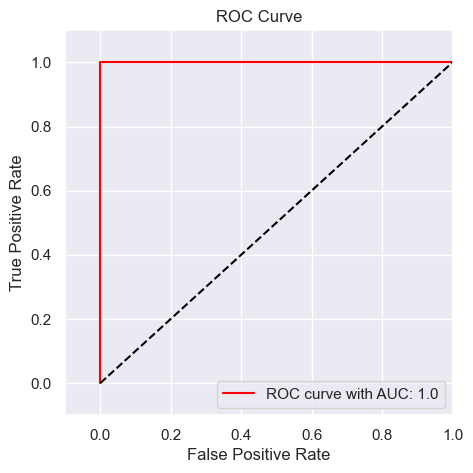

In [117]:
# AUC value on training data
fpr, tpr, _ = roc_curve(ytrain_n,  y_pred_n)
Train_AUC = roc_auc_score(ytrain_n, y_pred_n)
Train_AUC = round(Train_AUC, 3)
print('AUC for training data')
print(Train_AUC)

# ROC curve
print('ROC for training data')
plt.rcParams["figure.figsize"] = [5,5]
plt.plot(fpr, tpr, color='red', label='ROC curve with AUC: ' + str(Train_AUC))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.1])
plt.legend()
plt.show()

```
The distribution of the classes (bending and non-bending) is imbalanced in the test data, with only 4 samples belonging to the bending class and 15 samples belonging to the non-bending class.
```

In [28]:
# Get the coefficients of the built Logistic Regression model
params = np.append(logreg_model.intercept_,logreg_model.coef_)
print("The Logistic Regression model consists of the intercept and coefficients, which can be stated as follows::\n")
print(params)

The Logistic Regression model consists of the intercept and coefficients, which can be stated as follows::

[-0.03796761 -0.41388198 -0.39650289 -0.70287134 -0.6934151  -0.43149179
  0.36611421 -0.48890908 -0.43569083 -0.31308533  1.12242849  1.28742098
  0.65518917  0.73542844 -0.49582643 -0.37056174]


In [29]:
#p-values of the LR coefficients 
LR_model = LogisticRegression(solver='liblinear', C=sys.maxsize)
LR_model.fit(X_train,ytrain_n)  
params = np.append(LR_model.intercept_,LR_model.coef_)
predictions = LR_model.predict(X_train)
newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((np.array(ytrain_n)-np.array(y_pred_n))**2))/(len(newX)-len(newX[0]))
temp = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sqrt_temp  = np.sqrt(temp)
ts_b = params/ sqrt_temp
p_values = [2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
DF_pvalues = pd.DataFrame()
DF_pvalues["Coefficients"],DF_pvalues["Standard Errors"],DF_pvalues["t values"],DF_pvalues["P-values"] = [params,sqrt_temp,ts_b,p_values]
print(DF_pvalues)

    Coefficients  Standard Errors  t values  P-values
0      -0.037968              0.0      -inf       0.0
1      -0.413882              0.0      -inf       0.0
2      -0.396503              0.0      -inf       0.0
3      -0.702871              0.0      -inf       0.0
4      -0.693415              0.0      -inf       0.0
5      -0.431492              0.0      -inf       0.0
6       0.366114              0.0       inf       0.0
7      -0.488909              0.0      -inf       0.0
8      -0.435691              0.0      -inf       0.0
9      -0.313085              0.0      -inf       0.0
10      1.122428              0.0       inf       0.0
11      1.287421              0.0       inf       0.0
12      0.655189              0.0       inf       0.0
13      0.735428              0.0       inf       0.0
14     -0.495826              0.0      -inf       0.0
15     -0.370562              0.0      -inf       0.0


C:\Users\asus\AppData\Local\Temp\ipykernel_1436\3519744769.py:10: RuntimeWarning:

divide by zero encountered in true_divide



#### v. Test Classifier

In [30]:
# Create the TEST set
TestSet = {}
TestSet[l] = l_fullSet[l]    
merge_testset = [TestSet[l].iloc[l*0:l*2, :], TestSet[l].iloc[l*7:l*9, :], TestSet[l].iloc[l*13:l*16, :], TestSet[l].iloc[l*28:l*31, :], 
                    TestSet[l].iloc[l*43:l*46, :], TestSet[l].iloc[l*58:l*61, :], TestSet[l].iloc[l*73:l*76, :]]

TestSet[l] = pd.concat(merge_testset, axis=0) 

X_test = TestSet[l].iloc[:, 0:42]
X_test = X_test.iloc[:,Selected_features]
y_test = TestSet[l].iloc[:, 42:43]
y_test = np.ravel(y_test) 

In [31]:
y_test = [(s.replace('bending',"1").replace('all_others',"0")) for s in y_test]
y_test = [int(i) for i in y_test]

In [32]:
y_pred = LR_model.predict(X_test)

In [33]:
print("Training Accuracy:", LR_model.score(X_train, ytrain_n)*100, "%")
print("Cross-validation accuracy:", (1 - min(CVErrors))*100, "%")
print("Test Accuracy", LR_model.score(X_test, y_test)*100, "%\n")
print("Test Set Confusion matrix:\n",metrics.confusion_matrix(y_test, y_pred))

Training Accuracy: 100.0 %
Cross-validation accuracy: 100.0 %
Test Accuracy 94.73684210526315 %

Test Set Confusion matrix:
 [[14  1]
 [ 0  4]]


#### vi. Separation

From the Confusion Matrix we can crealy depict that there is significant amount of imbalance between bending and all_other class.

We also encountered an issue with class imbalance when employing 5-fold cross-validation, as some of the folds had no instances of certain classes. To address this problem, we implemented stratified k-fold cross-validation.

#### vii. Imbalance

In [40]:
%%time
LR_model_Imb = LogisticRegression(solver='liblinear', C=sys.maxsize) 
CV_Error_Imbalance = []

for l in range(1, 21):
    X = l_trainSet[l].iloc[:, 0:42]
    y = l_trainSet[l].iloc[:, 42:43]
    y = np.ravel(y) 
    for num_of_feat in range(1, 43):   
        skf = StratifiedKFold(n_splits=5, shuffle=True) #5-fold cross validation!
        skf.get_n_splits(X)
        list_5fold = []
        for train_index, test_index in skf.split(X,y):
            X_train_imb, X_test_imb = X.values[train_index], X.values[test_index]
            X_train_imb = pd.DataFrame(data=X_train_imb,index=None,columns=cols)
            X_test_imb = pd.DataFrame(data=X_test_imb,index=None,columns=cols)
            y_train_vii, y_test_vii = y[train_index], y[test_index]
            sm_imb = SMOTE(random_state=12, sampling_strategy = 'all')
            X_train_res, y_train_res = sm_imb.fit_resample(X_train_imb, y_train_vii)
            rfe = RFE(estimator = LR_model_Imb, n_features_to_select = num_of_feat) 
            rfe = rfe.fit(X_train_res, y_train_res)
            Selected_features = []
            for i in range(0, 42):
                if (rfe.ranking_[i] == 1):
                    Selected_features.append(i) 
            X_train_res = pd.DataFrame(data=X_train_res,index=None,columns=cols)
            X_test_imb = pd.DataFrame(data=X_test_imb,index=None,columns=cols)
            X_train_res = X_train_res.iloc[:, Selected_features]
            X_test_imb = X_test_imb.iloc[:, Selected_features] 
            LR_model_Imb.fit(X_train_res, y_train_res)
            list_5fold.append(1 - LR_model_Imb.score(X_test_imb, y_test_vii))
        CV_Error_Imbalance.append(sum(list_5fold) / len(list_5fold))
CV_Error_Imb_arr = np.asarray(CV_Error_Imbalance)
CV_Error_Imb_arr = CV_Error_Imb_arr.reshape(20,42) 
CV_Error_Imb_index = np.unravel_index(np.argmin(CV_Error_Imb_arr, axis=None), CV_Error_Imb_arr.shape)
print("The value of l that results in the lowest CV error is :", CV_Error_Imb_index[0] + 1)
print("The optimal number of selected features is: ", CV_Error_Imb_index[1] + 1)
print(f"The CV error for l = {CV_Error_Imb_index[0] + 1} is: {min(CV_Error_Imbalance)}")

The minimum CV error happens for : l = 1
The best number of features selected is : number of features = 10
The CV error for l = 1 is:  0.0
Wall time: 41min 51s


The confusion matrix is:

[[60  0]
 [ 0  9]]
AUC for training data
1.0
ROC for training data


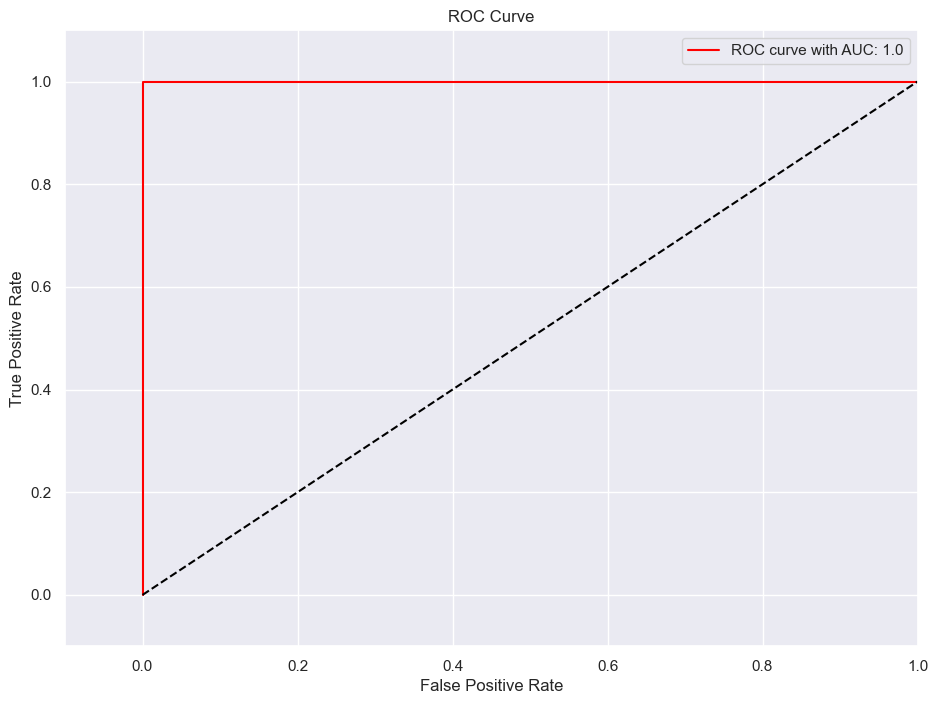

Wall time: 211 ms


In [47]:
%%time
l_imb = CV_Error_Imb_index[0] + 1
X_train_imb = l_trainSet[l_imb].iloc[:, 0:42]
y_train_imb = l_trainSet[l_imb].iloc[:, 42:43]
y_train_imb = np.ravel(y_train_imb) 
LR_model_Imb = LogisticRegression(solver='liblinear', C=sys.maxsize)
rfe = RFE(estimator = LR_model_Imb, n_features_to_select = CV_Error_Imb_index[1] + 1) 
rfe = rfe.fit(X_train_imb, y_train_imb)
Selected_features = []
for i in range(0, 42):
    if (rfe.ranking_[i] == 1):
        Selected_features.append(i) 
X_train_imb = X_train_imb.iloc[:, Selected_features]
LR_model_Imb.fit(X_train_imb, y_train_imb)
y_pred_imb = LR_model_Imb.predict(X_train_imb)
print("The confusion matrix is:\n")
print(metrics.confusion_matrix(y_train_imb, y_pred_imb))

###
ytrain_n = [(s.replace('bending',"1").replace('all_others',"0")) for s in y_train_imb]
ytrain_n = [int(i) for i in ytrain_n]
y_pred_n = [(s.replace('bending',"1").replace('all_others',"0")) for s in y_pred_imb]
y_pred_n = [int(i) for i in ytrain_n]

# AUC value on training data
fpr, tpr, _ = roc_curve(ytrain_n,  y_pred_n)
Train_AUC_imb = roc_auc_score(ytrain_n, y_pred_n)
Train_AUC_imb = round(Train_AUC_imb, 3)
print('AUC for training data')
print(Train_AUC_imb)

# ROC curve
print('ROC for training data')
plt.plot(fpr, tpr, color='red', label='ROC curve with AUC: ' + str(Train_AUC_imb))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.1])
plt.xlim([-0.1,1.])
plt.ylim([-0.1,1.1])
plt.legend()
plt.show()

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [65]:
%%time
LR_model_L1 = LogisticRegressionCV(Cs=10, penalty='l1', solver='liblinear', n_jobs = 4)
CV_Error_L1 = []
for l in range(1, 21):
    X = l_trainSet[l].iloc[:, 0:42]
    Xei = (X - X.mean()) / X.std() #Standardize
    Xei = Xei.fillna(0)
    Xei.drop(['min2', 'min4'], axis=1, inplace=True)
    y = l_trainSet[l].iloc[:, 42:43]
    y = np.ravel(y)
    skf = StratifiedKFold(n_splits=5, shuffle=True) 
    skf.get_n_splits(Xei)
    list_5fold = []
    for train_i, test_i in skf.split(Xei,y):
        X_train_L1, X_test_L1 = Xei.values[train_i], Xei.values[test_i]
        indices = (7, 21) # Indexes of min2 and min4
        cols_new = [i for j, i in enumerate(cols) if j not in indices]
        #print(cols_new)
        X_train_L1 = pd.DataFrame(data=X_train_L1,index=None,columns=cols_new)
        #print(X_train_L1)
        X_test_L1 = pd.DataFrame(data=X_test_L1,index=None,columns=cols_new)
        y_train_L1, y_test_L1 = y[train_i], y[test_i]
        LR_model_L1.fit(X_train_L1, y_train_L1)
        list_5fold.append(1 - LR_model_L1.score(X_test_L1, y_test_L1))
    CV_Error_L1.append(sum(list_5fold) / len(list_5fold))
Arrray_L1 = np.asarray(CV_Error_L1)
Arrray_L1 = Arrray_L1.reshape(20,1)
Arrray_L1_ind = np.unravel_index(np.argmin(Arrray_L1, axis=None), Arrray_L1.shape)
print("l value where CV error is lowest:", Arrray_L1_ind[0] + 1)
LR_model_L1.fit(l_trainSet[Arrray_L1_ind[0]+1].iloc[:, 0:42], 
          np.ravel(l_trainSet[Arrray_L1_ind[0]+1].iloc[:, 42:43]))
num_of_feat_L1 = 0
for i in range(0,40):
    if LR_model_L1.coef_.T[i] != 0:
        num_of_feat_L1 +=1 
print("The optimal number of selected features is:", num_of_feat_L1)
print(f"The CV error for l = {Arrray_L1_ind[0] + 1} is: {min(CV_Error_L1)}")

l value where CV error is lowest: 1
The optimal number of selected features is: 6
The CV error for l = 1 is: 0.02857142857142856
Wall time: 3min 51s


#### ii. Comparison

When comparing RFE and L1 regularization as feature selection methods, it was found that both approaches selected a similar number of features. However, the best value for the regularization coefficient lambda in L1 regularization varied across different runs of the cross-validation due to shuffling of the dataset. Despite this, L1 regularization was found to be easier to implement and had a faster cross-validation time compared to RFE, which had to cross-validate to determine the optimal number of features to keep in the model. However, L1 regularization still had a higher CV error of around 3% compared to the RFE approach, which achieved a CV error of zero.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [75]:
Full_Set, Train_Set, Test_Set = {},{},{}

for l in range(1,21):
    temp = []
    Full_Set[l] = l_fullSet[l].iloc[:, 0:42]
    for i in range (0,l*7): 
        temp.append('bending1')
    for i in range (0,l*6): 
        temp.append('bending2')
    for i in range (0,l*15): 
        temp.append('cycling')
    for i in range (0,l*15): 
        temp.append('lying')
    for i in range (0,l*15): 
        temp.append('sitting')
    for i in range (0,l*15): 
        temp.append('standing')
    for i in range (0,l*15): 
        temp.append('walking') 
        
    Full_Set[l]['Activity'] = temp
    #Train Set
    Train_Set[l] = Full_Set[l]
    TraingSet_List = [Train_Set[l].iloc[l*2:l*7, :], Train_Set[l].iloc[l*9:l*13, :], Train_Set[l].iloc[l*16:l*28, :], Train_Set[l].iloc[l*31:l*43, :],
            Train_Set[l].iloc[l*46:l*58, :], Train_Set[l].iloc[l*61:l*73, :], Train_Set[l].iloc[l*76:l*88, :]]
    Train_Set[l] = pd.concat(TraingSet_List, axis=0)
    #TEST Set
    Test_Set[l] = Full_Set[l]
    test_list = [Test_Set[l].iloc[l*0:l*2, :], Test_Set[l].iloc[l*7:l*9, :], Test_Set[l].iloc[l*13:l*16, :], Test_Set[l].iloc[l*28:l*31, :], Test_Set[l].iloc[l*43:l*46, :], Test_Set[l].iloc[l*58:l*61, :], Test_Set[l].iloc[l*73:l*76, :]]
    Test_Set[l] = pd.concat(test_list, axis=0)

In [79]:
print(Train_Set.keys())
Train_Set[1]

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])


min1   max1      mean1  median1      std1  first_quart1  third_quart1  \
2   35.00  47.40  43.954500    44.33  1.558835        43.000        45.000   
3   33.00  47.75  42.179813    43.50  3.670666        39.100        45.000   
4   33.00  45.75  41.678063    41.75  2.243490        41.330        42.750   
5   37.00  48.00  43.454958    43.25  1.386098        42.500        45.000   
6   36.25  48.00  43.969125    44.50  1.618364        43.290        44.670   
..    ...    ...        ...      ...       ...           ...           ...   
83  21.50  51.25  34.267229    35.00  4.954012        30.875        37.750   
84  19.50  45.33  33.560667    34.25  4.636988        30.125        37.000   
85  19.75  45.50  34.330562    35.25  4.748024        31.000        38.000   
86  19.50  46.00  34.542063    35.25  4.844056        31.250        37.875   
87  23.50  46.25  34.886250    35.29  4.530987        31.750        38.250   

    min2   max2     mean2  ...  first_quart5  third_quart5  min6   max6  \
2    0.0   1.70  0.426250  ...        35.325         36.50   0.0   1.79   
3    0.0   3.00  0.696042  ...        30.415         36.33   0.0   2.18   
4    0.0   2.83  0.535979  ...        28.415         31.25   0.0   1.79   
5    0.0   1.58  0.378083  ...        22.250         24.00   0.0   5.26   
6    0.0   1.50  0.413125  ...        20.500         23.75   0.0   2.96   
..   ...    ...       ...  ...           ...           ...   ...    ...   
83   0.0  13.55  4.450292  ...        13.750         18.00   0.0   8.32   
84   0.0  14.67  4.570375  ...        13.710         18.25   0.0   8.32   
85   0.0  13.47  4.461417  ...        13.500         17.75   0.0   9.67   
86   0.0  12.47  4.373833  ...        14.000         17.75   0.0  10.00   
87   0.0  14.82  4.391333  ...        13.750         18.00   0.0   9.51   

       mean6  median6      std6  first_quart6  third_quart6  Activity  
2   0.493292     0.43  0.513506          0.00         0.940  bending1  
3   0.613521     0.50  0.524317          0.00         1.000  bending1  
4   0.383292     0.43  0.389164          0.00         0.500  bending1  
5   0.679646     0.50  0.622534          0.43         0.870  bending1  
6   0.555313     0.49  0.487826          0.00         0.830  bending1  
..       ...      ...       ...           ...           ...       ...  
83  3.497729     3.27  1.692957          2.18         4.565   walking  
84  3.259042     3.11  1.640652          2.05         4.325   walking  
85  3.438562     3.22  1.733159          2.17         4.580   walking  
86  3.337250     3.08  1.655974          2.16         4.350   walking  
87  3.424187     3.27  1.690676          2.17         4.495   walking  

[69 rows x 43 columns]

In [76]:
Test_Set[1]

min1   max1      mean1  median1      std1  first_quart1  third_quart1  \
0   37.25  45.00  40.624792   40.500  1.476967        39.250        42.000   
1   38.00  45.67  42.812812   42.500  1.435550        42.000        43.670   
7   12.75  51.00  24.562958   24.250  3.737514        23.125        26.500   
8    0.00  42.75  27.464604   28.000  3.583582        25.500        30.000   
13  25.00  47.50  31.058250   29.710  4.829794        27.500        31.875   
14  24.25  45.00  37.177042   36.250  3.581301        34.500        40.250   
15  28.75  44.75  37.561188   36.875  3.226507        35.250        40.250   
28  24.25  45.00  37.177042   36.250  3.581301        34.500        40.250   
29  23.50  30.00  27.716375   27.500  1.442253        27.000        29.000   
30  24.75  48.33  44.182937   48.000  7.495615        48.000        48.000   
43  23.50  30.00  27.716375   27.500  1.442253        27.000        29.000   
44  33.25  48.00  42.363563   43.000  2.068247        42.000        43.500   
45  37.00  50.75  45.917667   45.635  1.089027        45.000        46.500   
58  29.25  46.50  42.739271   43.250  2.052809        41.330        44.500   
59  33.33  48.00  44.330208   45.000  2.474959        42.250        46.500   
60  35.50  46.25  43.175292   43.670  1.989273        42.500        44.500   
73  35.00  47.33  44.427646   45.000  2.452261        44.585        45.750   
74  19.33  43.50  34.205896   35.500  4.909561        30.450        37.750   
75  12.50  45.00  33.510250   34.125  4.849967        30.500        36.750   

    min2   max2     mean2  ...  first_quart5  third_quart5  min6  max6  \
0    0.0   1.30  0.358604  ...        33.000        36.000   0.0  1.92   
1    0.0   1.22  0.372438  ...        32.000        34.500   0.0  3.11   
7    0.0   6.87  0.590833  ...        20.500        27.000   0.0  4.97   
8    0.0   7.76  0.449708  ...        15.000        20.750   0.0  6.76   
13   0.0   6.38  0.405458  ...         9.000        18.375   0.0  4.92   
14   0.0   8.58  2.374208  ...        17.900        21.750   0.0  9.34   
15   0.0   9.91  2.080688  ...        18.000        21.500   0.0  9.62   
28   0.0   8.58  2.374208  ...        17.900        21.750   0.0  9.34   
29   0.0   1.79  0.363688  ...         5.500        10.750   0.0  4.50   
30   0.0   3.11  0.101875  ...         2.000         5.585   0.0  3.91   
43   0.0   1.79  0.363688  ...         5.500        10.750   0.0  4.50   
44   0.0   4.44  0.492563  ...        10.125        17.710   0.0  6.02   
45   0.0   4.87  0.324542  ...        16.500        21.000   0.0  7.22   
58   0.0   4.72  0.555333  ...        13.750        19.000   0.0  5.10   
59   0.0   3.90  0.432896  ...         9.330        17.750   0.0  5.02   
60   0.0   2.12  0.506646  ...        12.750        16.500   0.0  5.72   
73   0.0   4.50  0.352438  ...        11.000        14.670   0.0  5.91   
74   0.0  14.50  3.998021  ...        14.750        18.670   0.0  9.74   
75   0.0  13.05  4.452833  ...        14.670        18.750   0.0  8.96   

       mean6  median6      std6  first_quart6  third_quart6  Activity  
0   0.570583    0.430  0.582915         0.000          1.30  bending1  
1   0.571083    0.430  0.601010         0.000          1.30  bending1  
7   0.700188    0.500  0.693720         0.430          0.87  bending2  
8   1.122125    0.830  1.012342         0.470          1.30  bending2  
13  1.098104    0.940  0.831480         0.500          1.30   cycling  
14  2.921729    2.500  1.852600         1.500          3.90   cycling  
15  2.765896    2.450  1.769203         1.410          3.77   cycling  
28  2.921729    2.500  1.852600         1.500          3.90     lying  
29  0.734271    0.710  0.613688         0.430          1.00     lying  
30  0.692771    0.500  0.675781         0.215          0.94     lying  
43  0.734271    0.710  0.613688         0.430          1.00   sitting  
44  1.034021    0.830  0.985627         0.470          1.25   sitting  
45  0.904604    0.710  0.89

In [82]:
%%time
LRmodel = LogisticRegressionCV(Cs=10, penalty='l1', solver='saga', max_iter=10000, multi_class='multinomial')
CV_Errors_F = []
for l in range(1, 21):
    X_f = Train_Set[l].iloc[:, 0:42]
    Xfi = (X_f - X_f.mean()) / X_f.std() 
    Xfi=Xfi.fillna(0)
    Xfi.drop(['min2', 'min4'], axis=1, inplace=True)
    y_f = Train_Set[l].iloc[:, 42:43]
    y_f = np.ravel(y_f) 
    skf = StratifiedKFold(n_splits=3, shuffle=True) 
    skf.get_n_splits(Xfi)
    list_3fold = []
    for train_i, test_i in skf.split(Xfi,y_f):
        X_train_fi, X_test_fi = Xfi.values[train_i], Xfi.values[test_i]
        indices = (7, 21) 
        cols_new = [i for j, i in enumerate(cols) if j not in indices]
        X_train_fi = pd.DataFrame(data=X_train_fi,index=None,columns=cols_new)
        X_test_fi = pd.DataFrame(data=X_test_fi,index=None,columns=cols_new)
        y_train_fi, y_test_fi = y_f[train_i], y_f[test_i]
        LRmodel.fit(X_train_fi, y_train_fi)
        list_3fold.append(1 - LRmodel.score(X_test_fi, y_test_fi))
    CV_Errors_F.append(sum(list_3fold) / len(list_3fold))
CV_Error_arr = np.asarray(CV_Errors_F)
CV_Error_arr = CV_Error_arr.reshape(20,1)
CV_Error_ind = np.unravel_index(np.argmin(CV_Error_arr, axis=None), CV_Error_arr.shape)
print("Min CV error at l =", CV_Error_ind[0] + 1)
print(f"The CV error for l = {CV_Error_ind[0] + 1}, is: {min(CV_Errors_F)}")

Min CV error at l = 5
The CV error for l = 5, is: 0.08985507246376807
Wall time: 47min 10s


Taining Accuracy of the LR model is:  93.91304347826087 %
Cross-validation accuracy is:  91.01449275362319 %
Test Accuracy of the LR model is:  56.84210526315789 %

Test error of the LR model is:  43.15789473684211 %

Test Confusion Matrix is:

[[ 5  5  0  0  0  0  0]
 [ 2  5  1  0  2  0  0]
 [ 1  1 10  0  3  0  0]
 [ 0  0  5  5  3  2  0]
 [ 0  0  0  1 11  3  0]
 [ 0  0  0  2  5  8  0]
 [ 0  0  0  0  0  5 10]]


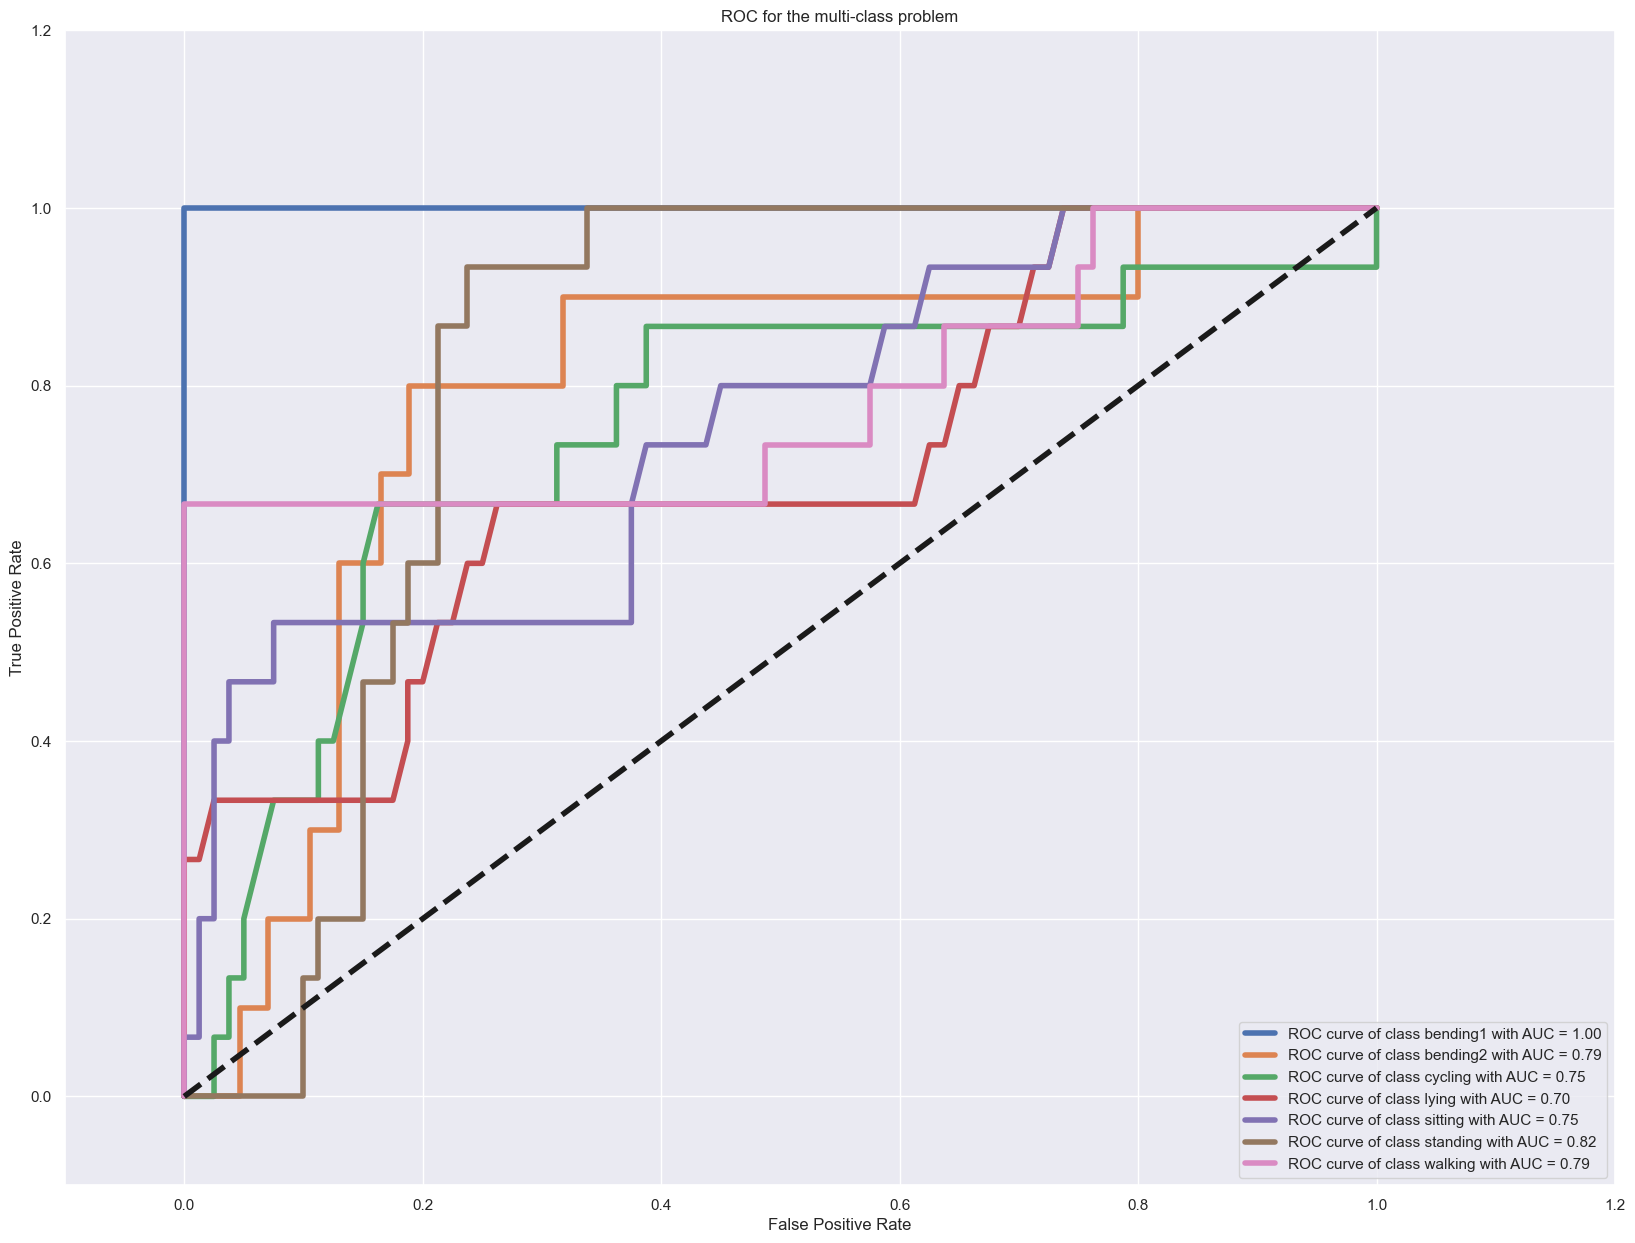

In [85]:
    #L1
    l = CV_Error_ind[0] + 1 
    X_train_fi = Train_Set[l].iloc[:, 0:42]
    y_train_fi = Train_Set[l].iloc[:, 42:43]
    y_train_fi = np.ravel(y_train_fi) 
    LRmodel = LogisticRegressionCV(Cs=10, penalty='l1', solver='saga', max_iter=10000, multi_class='multinomial')
    LRmodel.fit(X_train_fi, y_train_fi)
    y_pred_fi = LRmodel.predict(X_train_fi)
    print("Taining Accuracy of the LR model is: ", LRmodel.score(X_train_fi, y_train_fi)*100, "%")
    X_test_fi = Test_Set[l].iloc[:, 0:42]
    y_test_fi = Test_Set[l].iloc[:, 42:43]
    y_test_fi = np.ravel(y_test_fi) # In order to stop some warnings having to do with the definition of the shape
    print("Cross-validation accuracy is: ", (1 - min(CV_Errors_F))*100, "%")
    print("Test Accuracy of the LR model is: ", LRmodel.score(X_test_fi, y_test_fi)*100, "%\n")
    print("Test error of the LR model is: ", (1-LRmodel.score(X_test_fi, y_test_fi))*100, "%\n")
    print("Test Confusion Matrix is:\n")
    print(metrics.confusion_matrix(y_test_fi, LRmodel.predict(X_test_fi), labels=["bending1", "bending2", "cycling", "lying","sitting", "standing", "walking"]))
    fpr,tpr,roc_auc = dict(),dict(),dict()
    y_score = LRmodel.fit(X_train_fi, y_train_fi).decision_function(X_test_fi)
    y_test_new_fi = np.zeros((l*19,7))
    y_test_new_fi[0*l:2*l, 0] = 1
    y_test_new_fi[2*l:4*l, 1] = 1
    y_test_new_fi[4*l:7*l, 2] = 1
    y_test_new_fi[7*l:10*l, 3] = 1
    y_test_new_fi[10*l:13*l, 4] = 1
    y_test_new_fi[13*l:16*l, 5] = 1
    y_test_new_fi[16*l:19*l, 6] = 1
    classes = ["bending1", "bending2", "cycling", "lying","sitting", "standing", "walking"]
    for i in range(7):
        fpr[i], tpr[i], _ = roc_curve(y_test_new_fi[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i in range(7):
        plt.plot(fpr[i], tpr[i], lw=4,label=f'ROC curve of class {classes[i]} with AUC = {roc_auc[i]:0.2f}')
    plt.rcParams["figure.figsize"] = [20,15]
    plt.plot([0, 1], [0, 1], 'k--', lw=4)
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for the multi-class problem')
    plt.legend(loc="lower right")
    plt.show()

#### ii. Naive Bayes

In [90]:
%%time
NB_model = GaussianNB()
CV_Error_Gaussian = []
for l in range(1, 21):
    X_f = Train_Set[l].iloc[:, 0:42]
    X_Gaussian = X_f 
    y_f = Train_Set[l].iloc[:, 42:43]
    y_f = np.ravel(y_f) 
    skf = StratifiedKFold(n_splits=3, shuffle=True)
    skf.get_n_splits(X_Gaussian)
    list_3fold = []
    for train_i, test_i in skf.split(X_Gaussian,y_f):
        X_train_Gaussian, X_test_Gaussian = X_Gaussian.values[train_i], X_Gaussian.values[test_i]
        X_train_Gaussian = pd.DataFrame(data=X_train_Gaussian,index=None,columns=cols)
        X_test_Gaussian = pd.DataFrame(data=X_test_Gaussian,index=None,columns=cols)
        y_train_Gaussian, y_test_Gaussian = y_f[train_i], y_f[test_i]
        NB_model.fit(X_train_Gaussian, y_train_Gaussian)
        list_3fold.append(1 - NB_model.score(X_test_Gaussian, y_test_Gaussian))
    CV_Error_Gaussian.append(sum(list_3fold) / len(list_3fold))
CV_Error_Gaussian_arr = np.asarray(CV_Error_Gaussian)
CV_Error_Gaussian_arr = CV_Error_Gaussian_arr.reshape(20,1)
CV_Error_Gaussian_index = np.unravel_index(np.argmin(CV_Error_Gaussian_arr, axis=None), CV_Error_Gaussian_arr.shape)
print("Minimum CV error in Naive Bayes Gaussian likelihood is at l =", CV_Error_Gaussian_index[0] + 1)
print(f"The CV error for l = {CV_Error_Gaussian_index[0] + 1}, is: {min(CV_Error_Gaussian)}")

l = CV_Error_Gaussian_index[0] + 1 
X_train_Gaussian = Train_Set[l].iloc[:, 0:42]
y_train_Gaussian = Train_Set[l].iloc[:, 42:43]
y_train_Gaussian = np.ravel(y_train_Gaussian) 
NB_model = GaussianNB()
NB_model.fit(X_train_Gaussian, y_train_Gaussian)
y_pred_fii_Gaussian = NB_model.predict(X_train_Gaussian)
print("The accuracy of the NB_model on the training set is: ", NB_model.score(X_train_Gaussian, y_train_Gaussian)*100, "%")

Minimum CV error in Naive Bayes Gaussian likelihood is at l = 2
The CV error for l = 2, is: 0.11594202898550728
The accuracy of the NB_model on the training set is:  93.47826086956522 %
Wall time: 583 ms


Test cross-validation accuracy of the NB_model is:  88.40579710144927 %
Test accuracy of the NB_model is:  65.78947368421053 %

Test error of the NB_model Naive Bayes with Gaussian likelihood is:  34.210526315789465 %

The confusion matrix for the TEST data is:

[[4 0 0 0 0 0 0]
 [0 3 0 0 1 0 0]
 [0 0 4 0 2 0 0]
 [0 0 2 4 0 0 0]
 [0 0 0 2 3 1 0]
 [0 0 0 0 3 3 0]
 [0 0 0 0 0 2 4]]


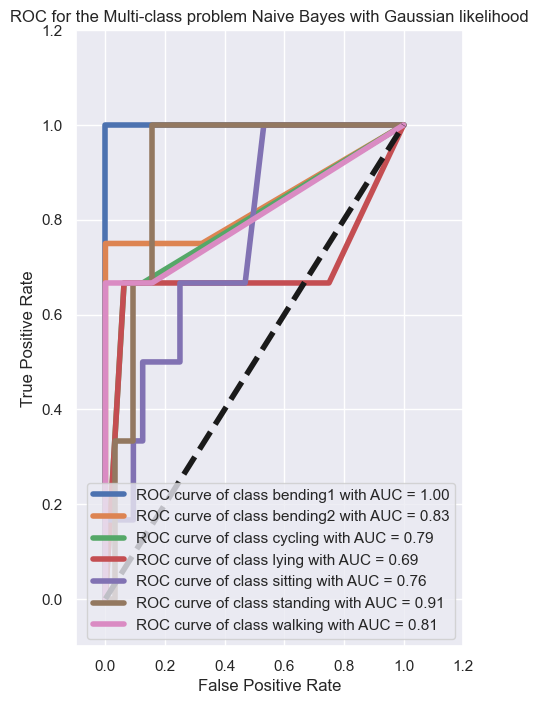

In [96]:
##
X_test_Gaussian = Test_Set[l].iloc[:, 0:42]
y_test_Gaussian = Test_Set[l].iloc[:, 42:43]
y_test_Gaussian = np.ravel(y_test_Gaussian) 
print("Test cross-validation accuracy of the NB_model is: ", (1 - min(CV_Error_Gaussian))*100, "%")
print("Test accuracy of the NB_model is: ", NB_model.score(X_test_Gaussian,y_test_Gaussian)*100, "%\n")
print("Test error of the NB_model Naive Bayes with Gaussian likelihood is: ",(1-NB_model.score(X_test_Gaussian, y_test_Gaussian))*100, "%\n")
print("The confusion matrix for the TEST data is:\n")
print(metrics.confusion_matrix(y_test_Gaussian, NB_model.predict(X_test_Gaussian), labels=["bending1", "bending2", "cycling", "lying","sitting", "standing", "walking"]))
fpr,tpr,roc_auc = dict(),dict(),dict()
y_score = NB_model.fit(X_train_Gaussian, y_train_Gaussian).predict_proba(X_test_Gaussian)
y_test_Gaussian_n = np.zeros((l*19,7))
y_test_Gaussian_n[0*l:2*l, 0] = 1
y_test_Gaussian_n[2*l:4*l, 1] = 1
y_test_Gaussian_n[4*l:7*l, 2] = 1
y_test_Gaussian_n[7*l:10*l, 3] = 1
y_test_Gaussian_n[10*l:13*l, 4] = 1
y_test_Gaussian_n[13*l:16*l, 5] = 1
y_test_Gaussian_n[16*l:19*l, 6] = 1
classes = ["bending1", "bending2", "cycling", "lying","sitting", "standing", "walking"]
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test_Gaussian_n[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(7):
    plt.plot(fpr[i], tpr[i], lw=4,label=f'ROC curve of class {classes[i]} with AUC = {roc_auc[i]:0.2f}')
plt.rcParams["figure.figsize"] = [5,8]
plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for the Multi-class problem Naive Bayes with Gaussian likelihood')
plt.legend(loc="lower right")
plt.show()

Multinomial Naive Bayes

In [99]:
NB_model = MultinomialNB()
CV_Errors_Multi = []
for l in range(1, 21):
    X_f = Train_Set[l].iloc[:, 0:42]
    X_f_multi = X_f 
    y_f = Train_Set[l].iloc[:, 42:43]
    y_f = np.ravel(y_f) 
    skf = StratifiedKFold(n_splits=3, shuffle=True)
    skf.get_n_splits(X_f_multi)
    list_3fold = []
    for train_index, test_index in skf.split(X_f_multi,y_f):
        X_train_Multi, X_test_Multi = X_f_multi.values[train_index], X_f_multi.values[test_index]
        X_train_Multi = pd.DataFrame(data=X_train_Multi,index=None,columns=cols)
        X_test_Multi = pd.DataFrame(data=X_test_Multi,index=None,columns=cols)
        y_train_Multi, y_test_Multi = y_f[train_index], y_f[test_index]
        NB_model.fit(X_train_Multi, y_train_Multi)
        list_3fold.append(1 - NB_model.score(X_test_Multi, y_test_Multi))
    CV_Errors_Multi.append(sum(list_3fold) / len(list_3fold))
CV_Errors_Multi_arr = np.asarray(CV_Errors_Multi)
CV_Errors_Multi_arr = CV_Errors_Multi_arr.reshape(20,1)
CV_Errors_Multi_ind = np.unravel_index(np.argmin(CV_Errors_Multi_arr, axis=None), CV_Errors_Multi_arr.shape)
print("Minimum CV error in Multinomial Naive Bayes is at l =", CV_Errors_Multi_ind[0] + 1)
print("Cross Validation error for l = ", CV_Errors_Multi_ind[0] + 1, "is", min(CV_Errors_Multi))

l = CV_Errors_Multi_ind[0] + 1 
X_train_Multi = Train_Set[l].iloc[:, 0:42]
y_train_Multi = Train_Set[l].iloc[:, 42:43]
y_train_Multi = np.ravel(y_train_Multi) 
NB_model = MultinomialNB()
NB_model.fit(X_train_Multi, y_train_Multi)
y_pred_fii_Multi = NB_model.predict(X_train_Multi)
print("Training Accuracy of the NB_model is: ", NB_model.score(X_train_Multi, y_train_Multi)*100, "%")

Minimum CV error in Multinomial Naive Bayes is at l = 1
Cross Validation error for l =  1 is 0.18840579710144925
Training Accuracy of the NB_model is:  94.20289855072464 %


Cross-validation accuracy of the NB_model is:  81.15942028985508 %
Test Accuracy of the NB_model is:  57.89473684210527 %

Test error of the NB_model Multinomial Naive Bayes is:  42.10526315789473 %

Test data Confusion matrix is:

[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 2 0 1 0 0]
 [0 0 1 2 0 0 0]
 [0 0 0 1 1 1 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 0 1 2]]


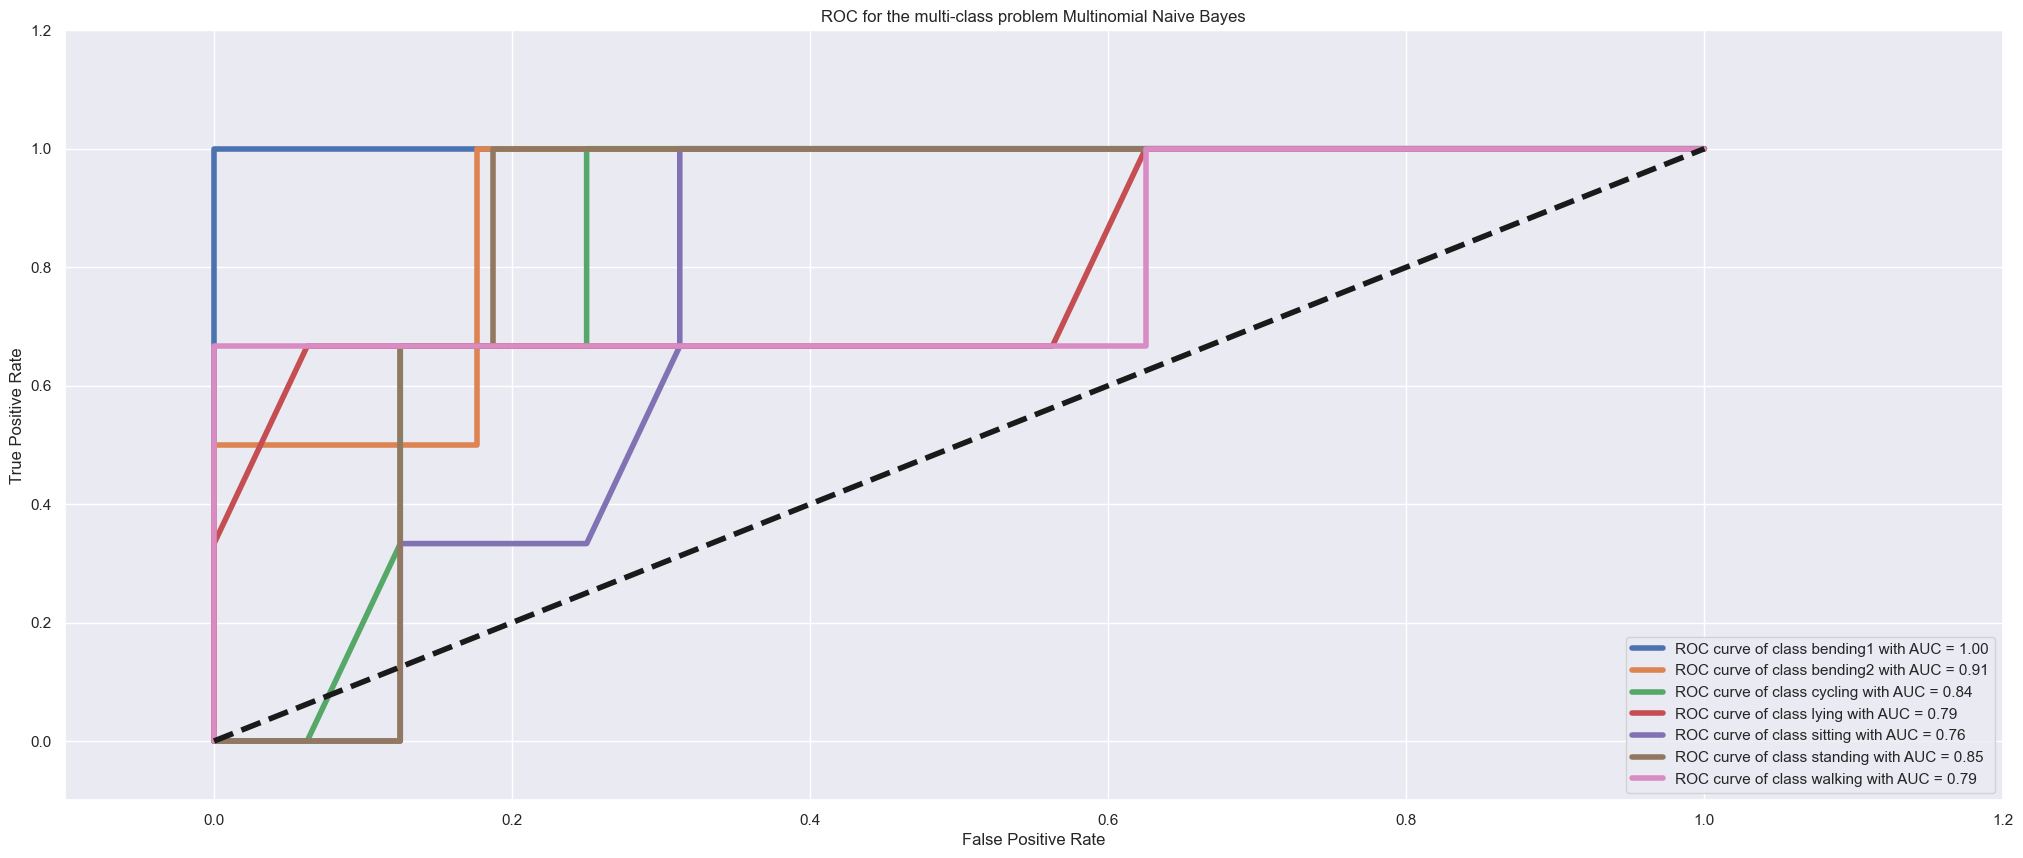

In [111]:
# Define X_test and y_test
X_test_Multi = Test_Set[l].iloc[:, 0:42]
y_test_Multi = Test_Set[l].iloc[:, 42:43]
y_test_Multi = np.ravel(y_test_Multi) 
print("Cross-validation accuracy of the NB_model is: ", (1 - min(CV_Errors_Multi))*100, "%")
print("Test Accuracy of the NB_model is: ", NB_model.score(X_test_Multi, y_test_Multi)*100, "%\n")
print("Test error of the NB_model Multinomial Naive Bayes is: ",(1-NB_model.score(X_test_Multi, y_test_Multi))*100, "%\n")
print("Test data Confusion matrix is:\n")
print(metrics.confusion_matrix(y_test_Multi, NB_model.predict(X_test_Multi),labels=["bending1", "bending2", "cycling", "lying","sitting", "standing", "walking"]))
fpr,tpr,roc_auc = dict(),dict(),dict()
y_score = NB_model.fit(X_train_Multi, y_train_Multi).predict_proba(X_test_Multi)
y_test_new_fii_Multi = np.zeros((l*19,7))
y_test_new_fii_Multi[0*l:2*l, 0] = 1
y_test_new_fii_Multi[2*l:4*l, 1] = 1
y_test_new_fii_Multi[4*l:7*l, 2] = 1
y_test_new_fii_Multi[7*l:10*l, 3] = 1
y_test_new_fii_Multi[10*l:13*l, 4] = 1
y_test_new_fii_Multi[13*l:16*l, 5] = 1
y_test_new_fii_Multi[16*l:19*l, 6] = 1
classes = ["bending1", "bending2", "cycling", "lying","sitting", "standing", "walking"]
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test_new_fii_Multi[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(7):
    plt.plot(fpr[i], tpr[i], lw=4,
             label=f'ROC curve of class {classes[i]} with AUC = {roc_auc[i]:0.2f}')
plt.rcParams["figure.figsize"] = [20,10]
plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for the multi-class problem Multinomial Naive Bayes')
plt.legend(loc="lower right")
plt.show()

#### ii. Comparison

The choice of best l values differed between Naive Bayes with Gaussian likelihood and Multinomial Naive Bayes. While Naive Bayes with Gaussian likelihood achieved slightly better accuracy in Training and Cross-validation, both methods performed similarly in Test accuracy, which is considered a more reliable metric for assessing classification success. Therefore, it can be inferred that both techniques performed almost equally well on the provided dataset.

The Test accuracy of Logistic Regression with L1 regularization was inferior to that of Naive Bayes with Gaussian likelihood and Multinomial Naive Bayes. Thus, in the context of this specific dataset, the performance of Naive Bayes with Gaussian likelihood and Multinomial Naive Bayes surpassed that of Logistic Regression with L1 regularization for the multi-class classification task.

## 3. ISLR 4.8.3

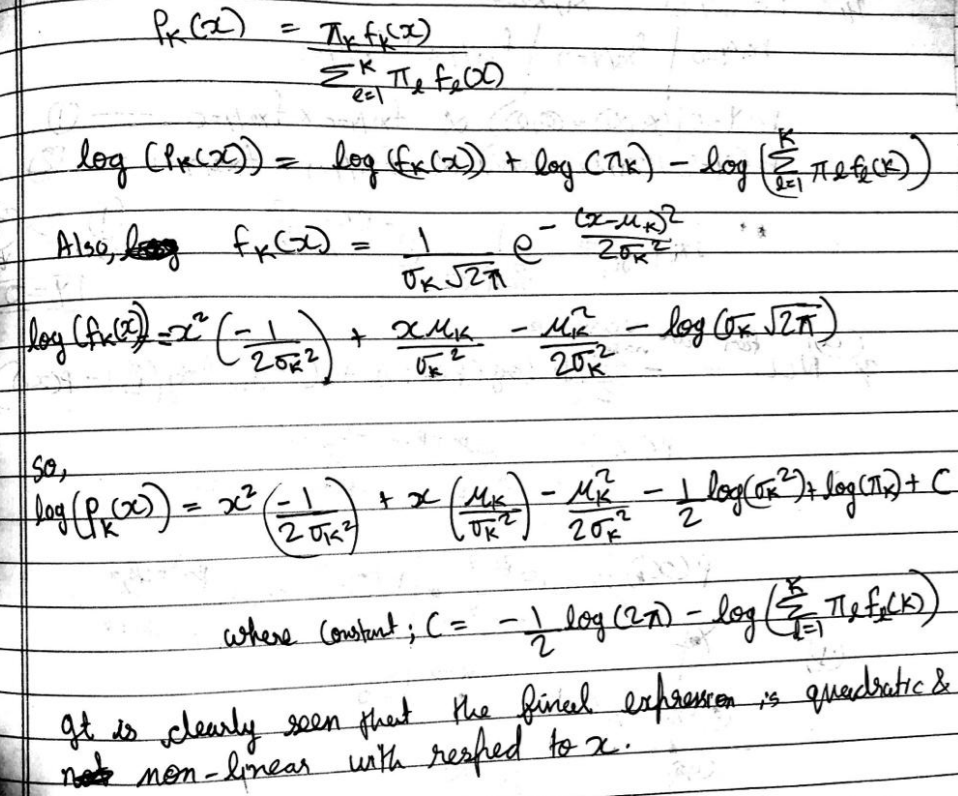

## 4. ISLR 4.8.7

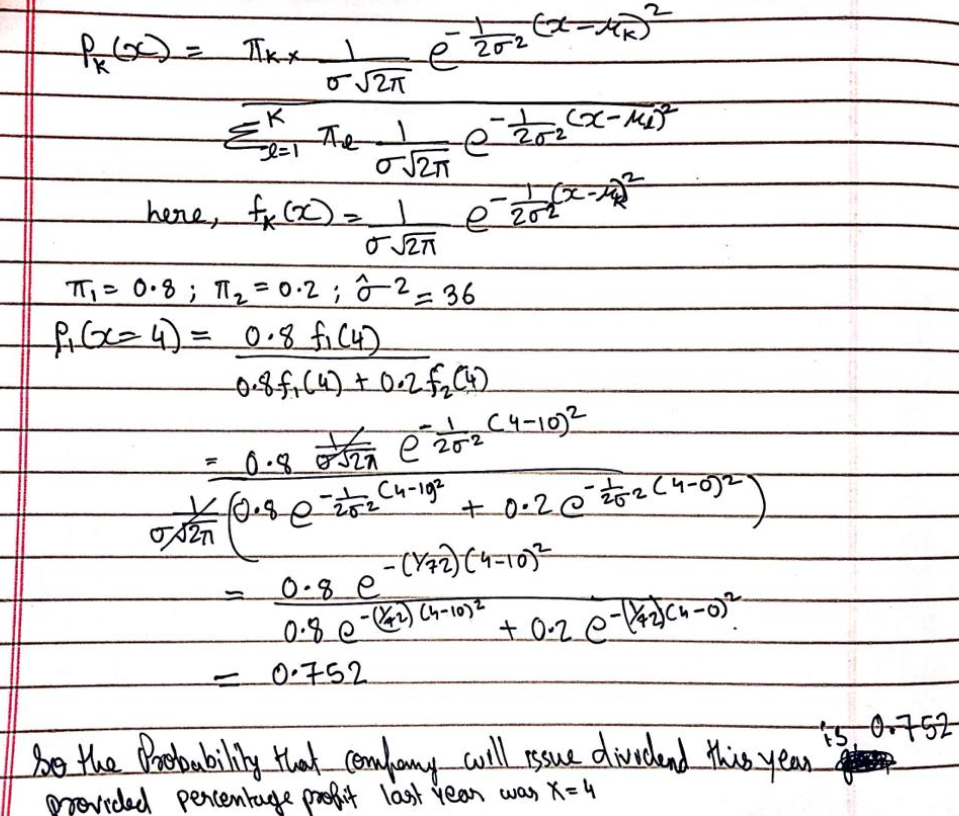

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9